In [360]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [361]:
df = pd.read_csv('C:\\Users\\dhanu\\glassdoor_jobs.csv',encoding='latin1')

In [362]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [363]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB


In [364]:
df.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [365]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

In [366]:
df.shape

(956, 14)

**Handling Missing Values**

In [368]:
df.isnull().sum()

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64

# **Data Cleaning**

**Analyzing Rating**

In [371]:
df.Rating.describe()

count    956.000000
mean       3.601255
std        1.067619
min       -1.000000
25%        3.300000
50%        3.800000
75%        4.200000
max        5.000000
Name: Rating, dtype: float64

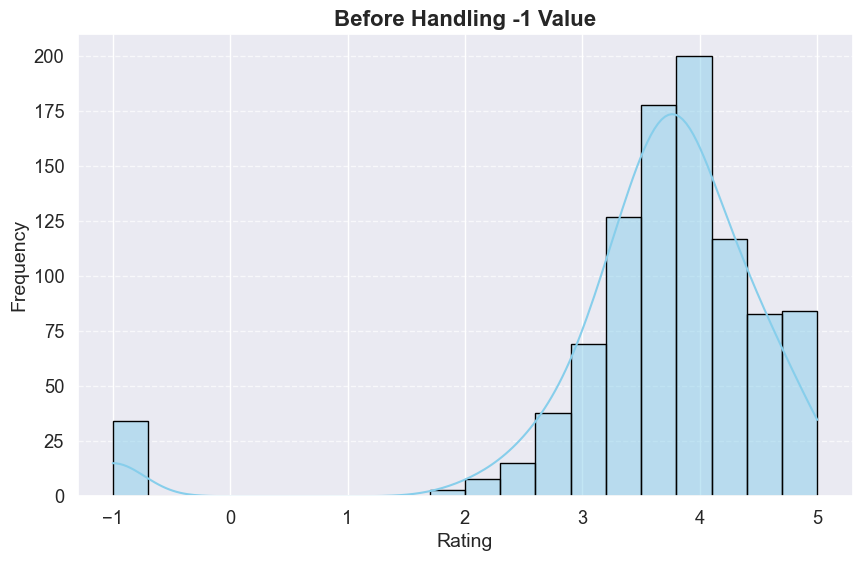

In [372]:
plt.figure(figsize=(10, 6))  
sns.histplot(
    x='Rating',
    data=df,
    kde=True,
    bins=20,  
    color='skyblue', 
    edgecolor='black' 
)


plt.title('Before Handling -1 Value', fontsize=16, fontweight='bold')
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)


plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [373]:
df['Rating'] = df['Rating'].apply(lambda x: np.NaN if x== -1 else x)
df['Rating']=df['Rating'].fillna(df['Rating'].mean())

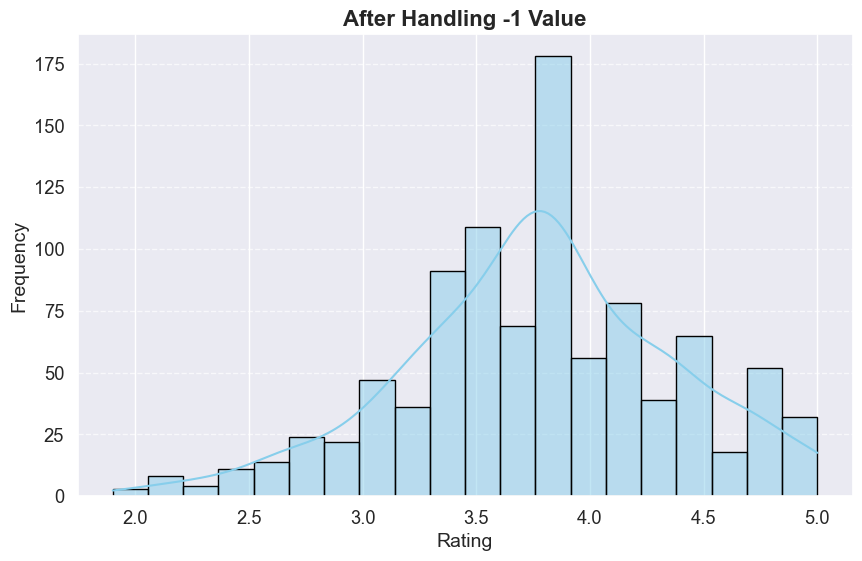

In [374]:
plt.figure(figsize=(10, 6))  
sns.histplot(
    x='Rating',
    data=df,
    kde=True,
    bins=20,  
    color='skyblue', 
    edgecolor='black' 
)


plt.title('After Handling -1 Value', fontsize=16, fontweight='bold')
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)


plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

**Outlier Detection In Rating**

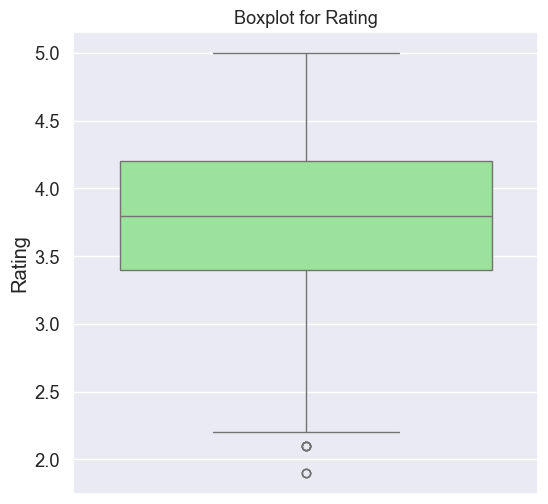

In [376]:
plt.figure(figsize=(6,6))
sns.boxplot(y='Rating',data=df,color='lightgreen')
plt.title('Boxplot for Rating', fontsize=13 )
plt.show()

**Analyzing Founded**

In [378]:
df.Founded.describe()

count     956.000000
mean     1774.605649
std       598.942517
min        -1.000000
25%      1937.000000
50%      1992.000000
75%      2008.000000
max      2019.000000
Name: Founded, dtype: float64

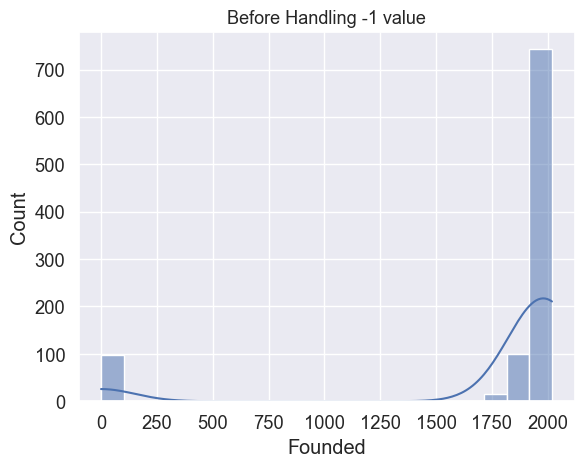

In [379]:
sns.histplot(df['Founded'],kde=True,bins=20)
plt.title('Before Handling -1 value', fontsize=13)
plt.show()

In [380]:
df['Founded'] = df['Founded'].apply(lambda x: np.NaN if x==-1 else x)
df['Founded'] = df['Founded'].fillna(df['Founded'].median())
df['Founded']=df['Founded'].astype('int')

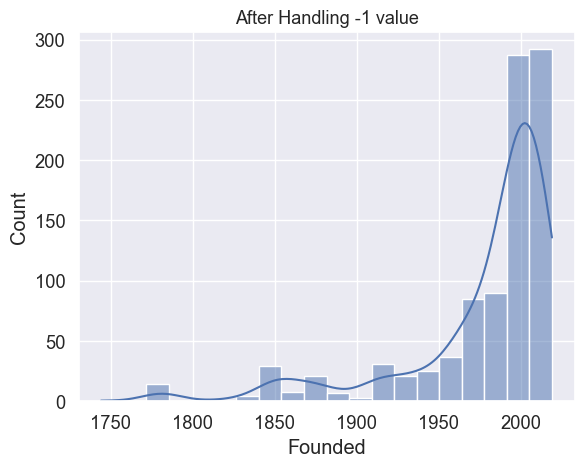

In [381]:
sns.histplot(df['Founded'],kde=True,bins=20)
plt.title('After Handling -1 value', fontsize=13)
plt.show()

**Outlier Detection in Founded**

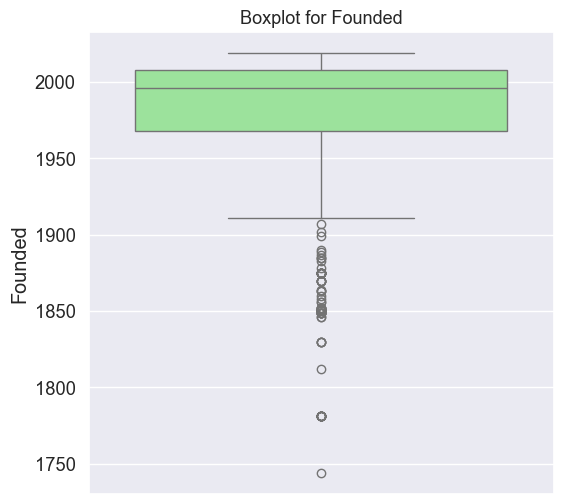

In [383]:
plt.figure(figsize=(6,6))
sns.boxplot(y='Founded',data=df,color='lightgreen')
plt.title('Boxplot for Founded', fontsize=13 )
plt.show()

**Analyzing Job Title**

In [385]:
df['Job Title'].value_counts()[:20]

Job Title
Data Scientist                                            178
Data Engineer                                              68
Senior Data Scientist                                      42
Data Analyst                                               18
Senior Data Engineer                                       17
Business Intelligence Analyst                              13
Senior Data Analyst                                        12
Lead Data Scientist                                         8
Data Science Manager                                        7
Principal Data Scientist                                    6
Machine Learning Engineer                                   6
Marketing Data Analyst                                      6
Sr. Data Engineer                                           6
Analytics Manager                                           5
Lead Data Engineer                                          5
Data Engineer 5 - Contract                                  

**Cleaning Job Title**

In [387]:
def cleaning_job_title(title):
    if 'data scientist' in title.lower() or 'scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return'data engineer'
    elif 'data analyst' in title.lower():
        return 'data analyst'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    elif 'machine learning' in title.lower():
        return 'mle'
    else: 
        return 'other'

In [388]:
df['JobTitle'] = df['Job Title'].apply(cleaning_job_title)
df['JobTitle'].value_counts()

JobTitle
data scientist    560
data engineer     158
data analyst      105
other              72
manager            35
director           13
mle                13
Name: count, dtype: int64

C:\Users\dhanu\AppData\Local\Temp\ipykernel_10544\1178877366.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


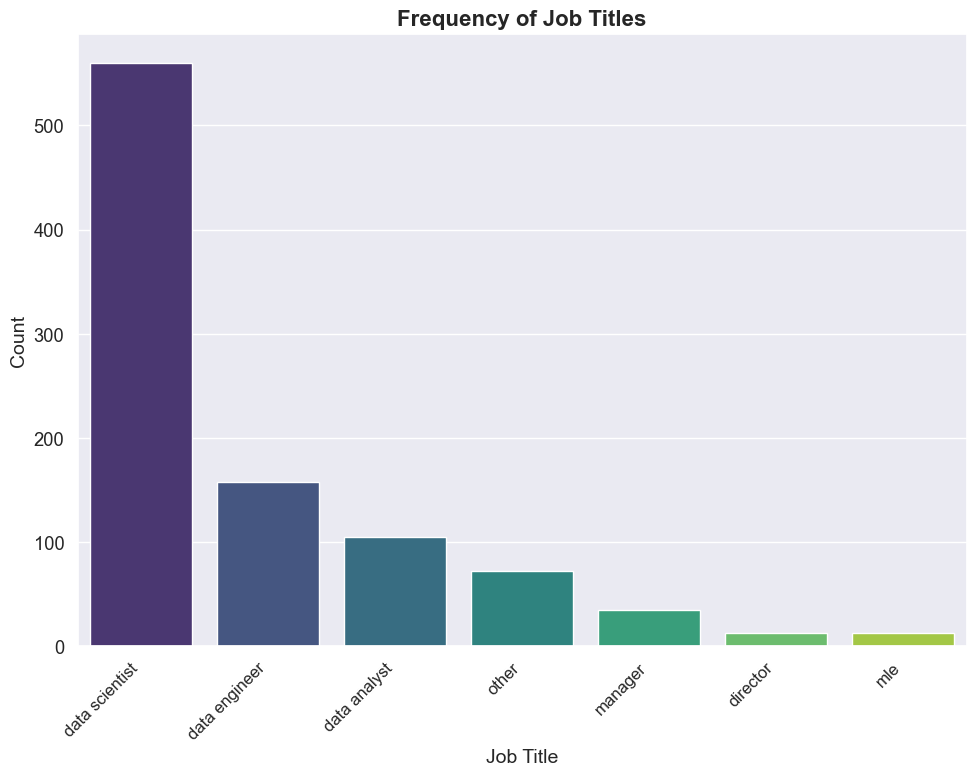

In [389]:
plt.figure(figsize=(10, 8))
sns.countplot(
    x='JobTitle',
    data=df,
    order=df['JobTitle'].value_counts().index,
    palette='viridis'  
)


plt.title('Frequency of Job Titles', fontsize=16, fontweight='bold')
plt.xlabel('Job Title', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)




plt.tight_layout()
plt.show()


**Analyzing Job-Title Seniority**

In [391]:
def getting_title_seniority(title):
    if 'sr.' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'sr'
    elif 'junior' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'other'

In [392]:
df['JobSeniority'] = df['Job Title'].apply(getting_title_seniority)
df['JobSeniority'].value_counts()

JobSeniority
other    701
sr       252
jr         3
Name: count, dtype: int64

In [393]:
df.drop(columns = ['Job Title'],axis=1,inplace=True)

C:\Users\dhanu\AppData\Local\Temp\ipykernel_10544\688602723.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


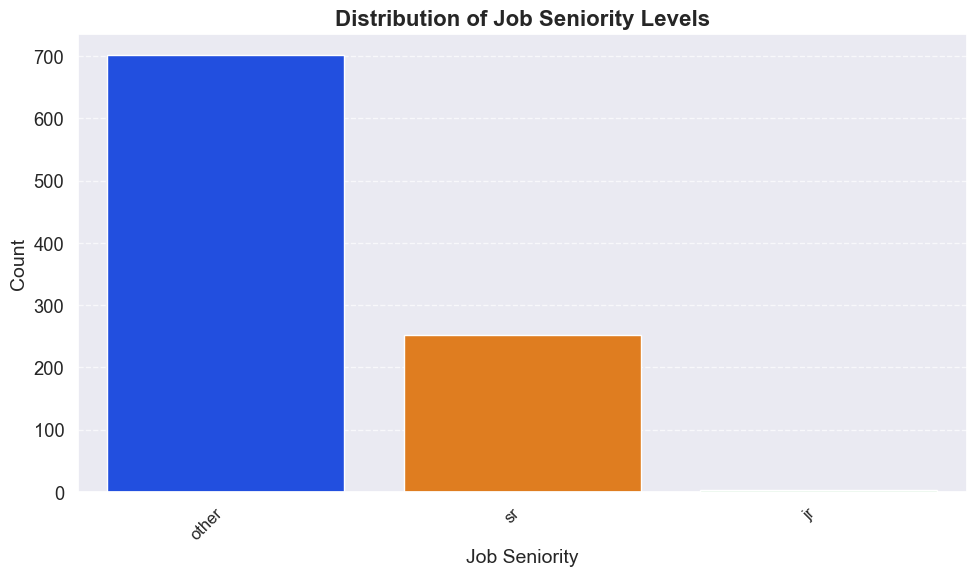

In [394]:
plt.figure(figsize=(10, 6))  


sns.countplot(
    x='JobSeniority',
    data=df,
    order=df['JobSeniority'].value_counts().index,
    palette='bright' 
)


plt.title('Distribution of Job Seniority Levels', fontsize=16, fontweight='bold')
plt.xlabel('Job Seniority', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12, rotation=45, ha='right')


plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Analysing Company Name**

In [396]:
df['Company Name'].head()

0                        Tecolote Research\n3.8
1    University of Maryland Medical System\n3.4
2                                  KnowBe4\n4.8
3                                     PNNL\n3.8
4                       Affinity Solutions\n2.9
Name: Company Name, dtype: object

In [397]:
df['Company Name'] = df['Company Name'].apply(lambda x: x.split('\n')[0])


C:\Users\dhanu\AppData\Local\Temp\ipykernel_10544\3741113823.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


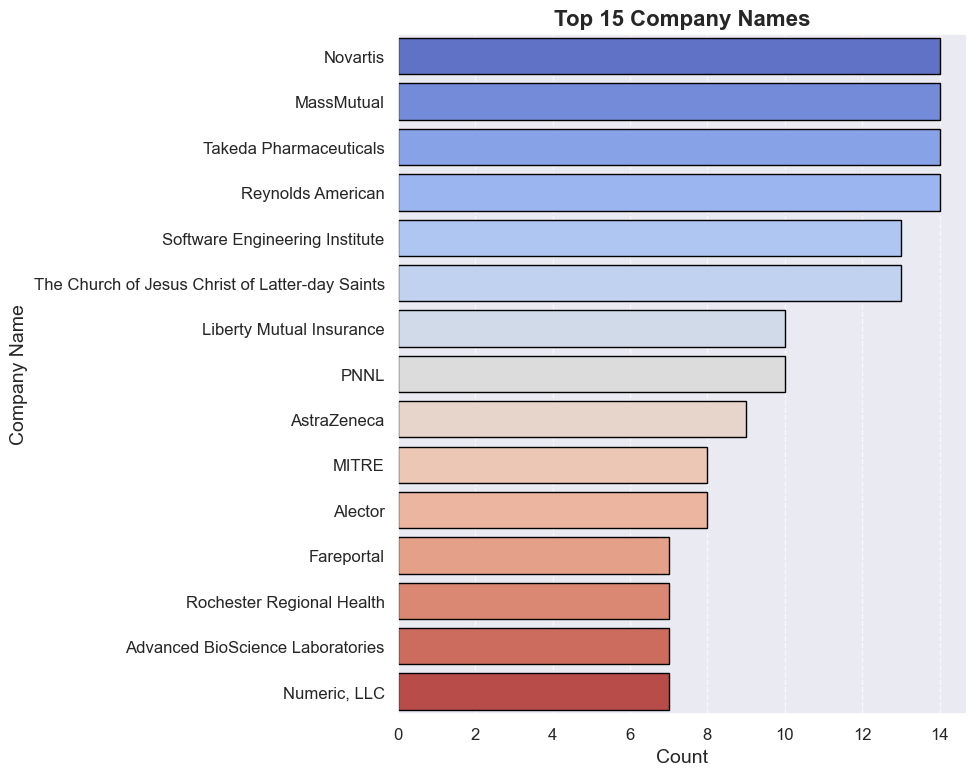

In [398]:
plt.figure(figsize=(10, 8))

sns.countplot(
    y='Company Name',
    data=df,
    order=df['Company Name'].value_counts()[:15].index,
    palette='coolwarm' ,edgecolor='black' 
)


plt.title('Top 15 Company Names', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Company Name', fontsize=14)


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()


**Analyzing Location**

In [400]:
df['Location'].head()

0    Albuquerque, NM
1      Linthicum, MD
2     Clearwater, FL
3       Richland, WA
4       New York, NY
Name: Location, dtype: object

In [401]:
df['JobState'] = df['Location'].apply(lambda x: x if ',' not in x else x.split(',')[1].strip())
print('Total no.of unique locations: {}'.format(len(df['JobState'].unique())))

Total no.of unique locations: 46


C:\Users\dhanu\AppData\Local\Temp\ipykernel_10544\1549473645.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


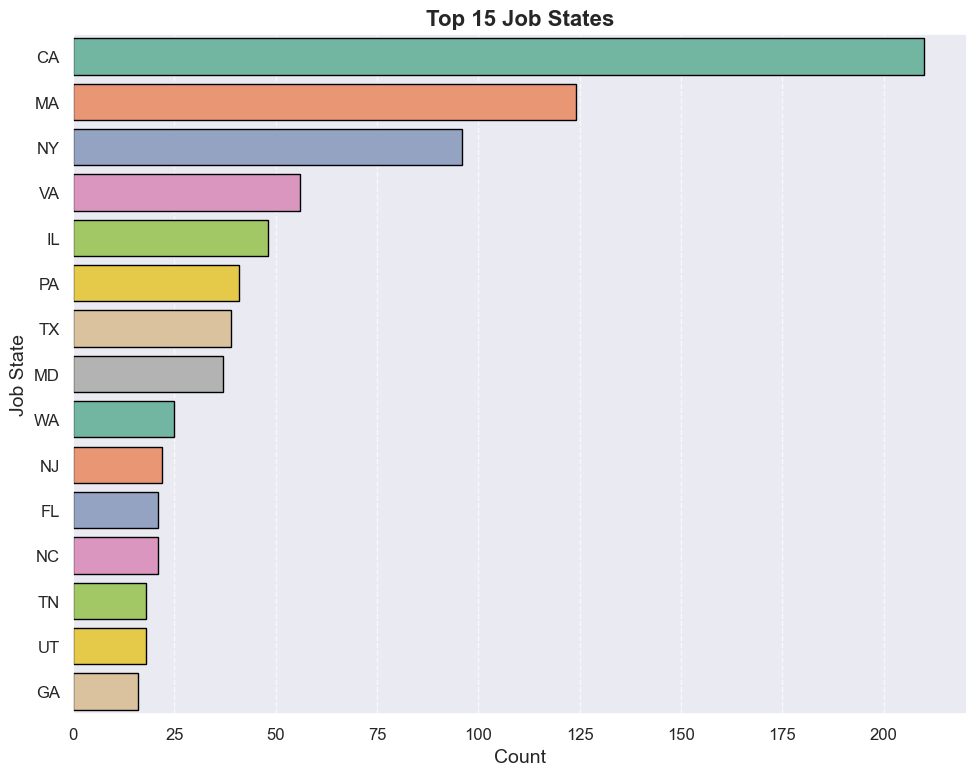

In [402]:
plt.figure(figsize=(10, 8)) 


sns.countplot(
    y='JobState',
    data=df,
    order=df['JobState'].value_counts()[:15].index,
    palette='Set2' ,edgecolor='black'
)


plt.title('Top 15 Job States', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Job State', fontsize=14)


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Analysing Size**

In [404]:
df['Size'].head()

0     501 to 1000 employees
1          10000+ employees
2     501 to 1000 employees
3    1001 to 5000 employees
4       51 to 200 employees
Name: Size, dtype: object

In [405]:
df['Size'].value_counts()

Size
1001 to 5000 employees     177
201 to 500 employees       160
51 to 200 employees        155
10000+ employees           154
501 to 1000 employees      144
5001 to 10000 employees     79
1 to 50 employees           61
Unknown                     15
-1                          11
Name: count, dtype: int64

In [406]:
def analysing_size(title):
    if '-1' in title.lower():
        return 'Unknown'
    else:
        return title

df['Size']=df['Size'].apply(analysing_size)

In [407]:
df['Size'] = df['Size'].apply(analysing_size)

C:\Users\dhanu\AppData\Local\Temp\ipykernel_10544\2201384497.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


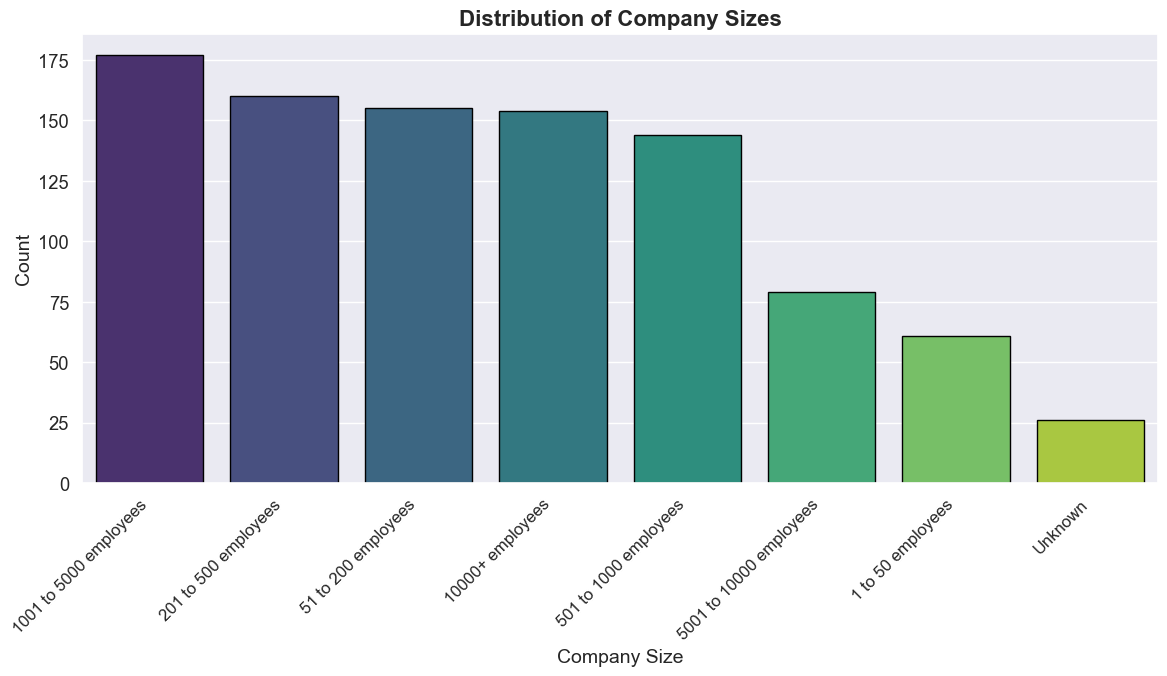

In [408]:
plt.figure(figsize=(12, 7)) 

sns.countplot(
    x='Size',
    data=df,
    order=df['Size'].value_counts().index,
    palette='viridis',
    edgecolor='black'
)


plt.title('Distribution of Company Sizes', fontsize=16, fontweight='bold')
plt.xlabel('Company Size', fontsize=14)
plt.ylabel('Count', fontsize=14)


plt.xticks(fontsize=12, rotation=45, ha='right')

plt.tight_layout()


plt.show()


**Analysing Type of Ownership**

In [410]:
df['Type of ownership'].head()

0     Company - Private
1    Other Organization
2     Company - Private
3            Government
4     Company - Private
Name: Type of ownership, dtype: object

In [411]:
df['Type of ownership'].value_counts()

Type of ownership
Company - Private                 532
Company - Public                  237
Nonprofit Organization             65
Subsidiary or Business Segment     40
Government                         17
Hospital                           15
College / University               15
Unknown                            11
-1                                 11
Other Organization                  5
Contract                            5
School / School District            2
Private Practice / Firm             1
Name: count, dtype: int64

In [412]:
def analysing_ownership(title):
    if 'private' in title.lower():
        return 'Private'
    elif 'public' in title.lower():
        return 'Public'
    elif ('-1' in title.lower()) or ('unknown' in title.lower()) or ('school/ school district' in title.lower()):
        return 'Other Organisation'
    else:
        return title
df['Type of ownership'] = df['Type of ownership'].apply(analysing_ownership)

In [413]:
df['Type of ownership'].value_counts()

Type of ownership
Private                           533
Public                            237
Nonprofit Organization             65
Subsidiary or Business Segment     40
Other Organisation                 22
Government                         17
Hospital                           15
College / University               15
Other Organization                  5
Contract                            5
School / School District            2
Name: count, dtype: int64

C:\Users\dhanu\AppData\Local\Temp\ipykernel_10544\2760761742.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


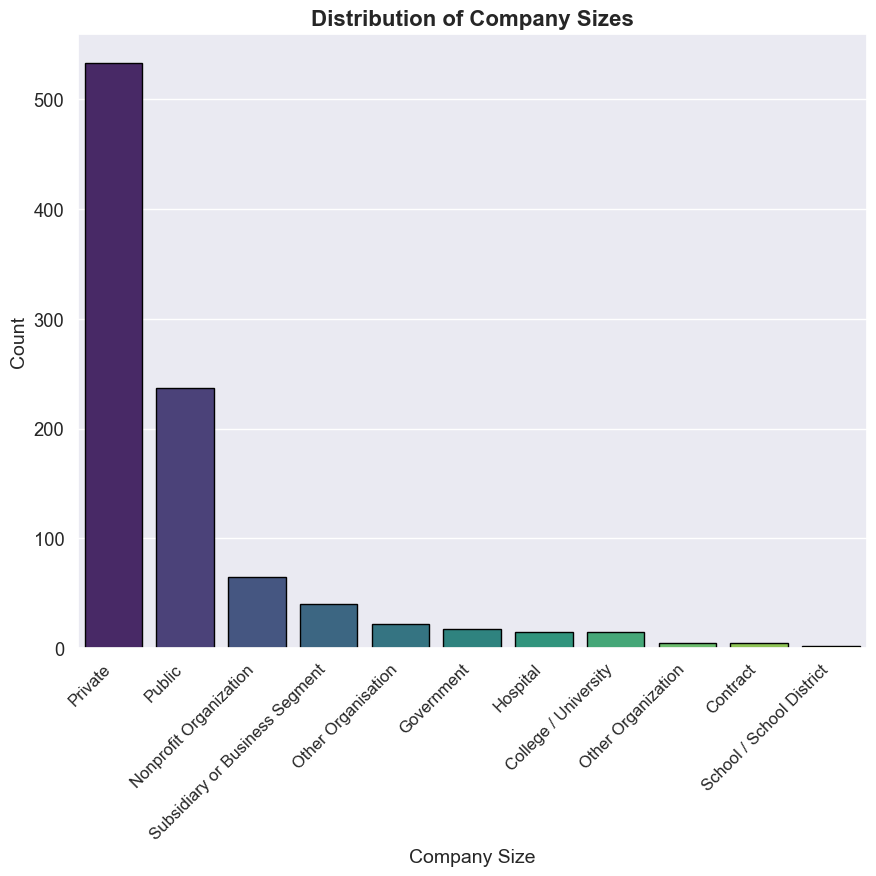

In [414]:
plt.figure(figsize=(9,9)) 

sns.countplot(
    x='Type of ownership',
    data=df,
    order=df['Type of ownership'].value_counts().index,
    palette='viridis',
    edgecolor='black'
)


plt.title('Distribution of Company Sizes', fontsize=16, fontweight='bold')
plt.xlabel('Company Size', fontsize=14)
plt.ylabel('Count', fontsize=14)


plt.xticks(fontsize=12, rotation=45, ha='right')

plt.tight_layout()


plt.show()


**Analysing Industry**

In [416]:
df['Industry'].value_counts()[:20]

Industry
Biotech & Pharmaceuticals                  148
IT Services                                 77
Computer Hardware & Software                70
Insurance Carriers                          65
Enterprise Software & Network Solutions     56
Health Care Services & Hospitals            51
Staffing & Outsourcing                      39
-1                                          39
Internet                                    36
Consulting                                  34
Aerospace & Defense                         32
Advertising & Marketing                     25
Consumer Products Manufacturing             23
Research & Development                      21
Banks & Credit Unions                       19
Colleges & Universities                     18
Lending                                     14
Energy                                      14
Religious Organizations                     13
Federal Agencies                            13
Name: count, dtype: int64

In [417]:
df['Industry']=df['Industry'].apply(lambda x: 'Others' if x=='-1' else x)

C:\Users\dhanu\AppData\Local\Temp\ipykernel_10544\1189258764.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


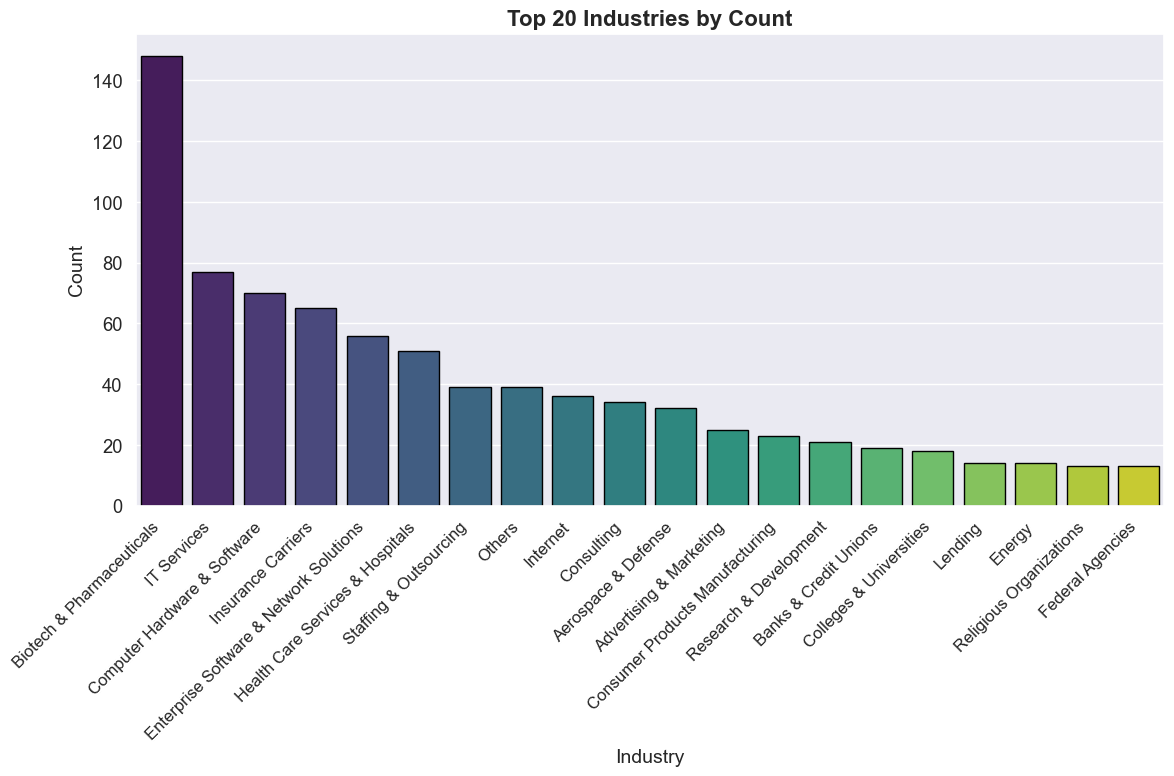

In [418]:
plt.figure(figsize=(12,8)) 

sns.countplot(
    x='Industry',
    data=df,
    order=df['Industry'].value_counts()[:20].index,
    palette='viridis',
    edgecolor='black'
)


plt.title('Top 20 Industries by Count', fontsize=16, fontweight='bold')
plt.xlabel('Industry', fontsize=14)
plt.ylabel('Count', fontsize=14)


plt.xticks(fontsize=12, rotation=45, ha='right')

plt.tight_layout()


plt.show()

**Analysing Sector**

In [420]:
df['Sector'].value_counts()

Sector
Information Technology                239
Biotech & Pharmaceuticals             148
Business Services                     134
Insurance                              71
Finance                                56
Health Care                            51
Manufacturing                          40
-1                                     39
Aerospace & Defense                    32
Education                              26
Retail                                 16
Non-Profit                             16
Oil, Gas, Energy & Utilities           15
Media                                  13
Government                             13
Transportation & Logistics              8
Real Estate                             8
Travel & Tourism                        8
Telecommunications                      6
Arts, Entertainment & Recreation        4
Construction, Repair & Maintenance      4
Consumer Services                       4
Mining & Metals                         3
Agriculture & Forestry     

In [421]:
df['Sector']= df['Sector'].apply(lambda x: 'Others' if x=='-1' else x)

C:\Users\dhanu\AppData\Local\Temp\ipykernel_10544\4006067596.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


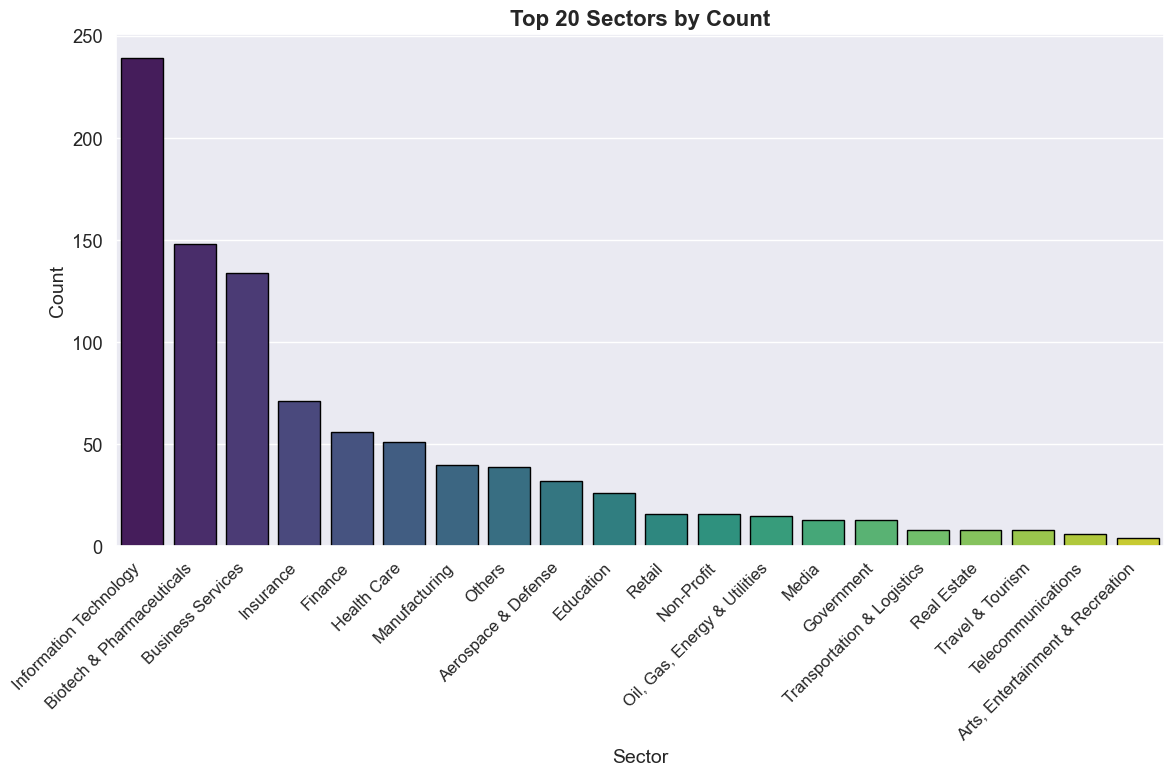

In [422]:
plt.figure(figsize=(12,8)) 

sns.countplot(
    x='Sector',
    data=df,
    order=df['Sector'].value_counts()[:20].index,
    palette='viridis',
    edgecolor='black'
)


plt.title('Top 20 Sectors by Count', fontsize=16, fontweight='bold')
plt.xlabel('Sector', fontsize=14)
plt.ylabel('Count', fontsize=14)


plt.xticks(fontsize=12, rotation=45, ha='right')

plt.tight_layout()


plt.show()

**Analysing Revenue**

In [424]:
df['Revenue'].value_counts()

Revenue
Unknown / Non-Applicable            299
$10+ billion (USD)                  140
$100 to $500 million (USD)          107
$1 to $2 billion (USD)               68
$500 million to $1 billion (USD)     62
$25 to $50 million (USD)             59
$50 to $100 million (USD)            52
$2 to $5 billion (USD)               44
$10 to $25 million (USD)             39
$5 to $10 million (USD)              29
$5 to $10 billion (USD)              20
$1 to $5 million (USD)               17
-1                                   11
Less than $1 million (USD)            9
Name: count, dtype: int64

In [425]:
def analysing_revenue(title):
    if '-1' in title.lower():
        return 'Unknown / Non-Applicable'
    else:
        return title
df['Revenue'] = df['Revenue'].apply(analysing_revenue)

In [426]:
df['Revenue'].value_counts()

Revenue
Unknown / Non-Applicable            310
$10+ billion (USD)                  140
$100 to $500 million (USD)          107
$1 to $2 billion (USD)               68
$500 million to $1 billion (USD)     62
$25 to $50 million (USD)             59
$50 to $100 million (USD)            52
$2 to $5 billion (USD)               44
$10 to $25 million (USD)             39
$5 to $10 million (USD)              29
$5 to $10 billion (USD)              20
$1 to $5 million (USD)               17
Less than $1 million (USD)            9
Name: count, dtype: int64

C:\Users\dhanu\AppData\Local\Temp\ipykernel_10544\2492375104.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


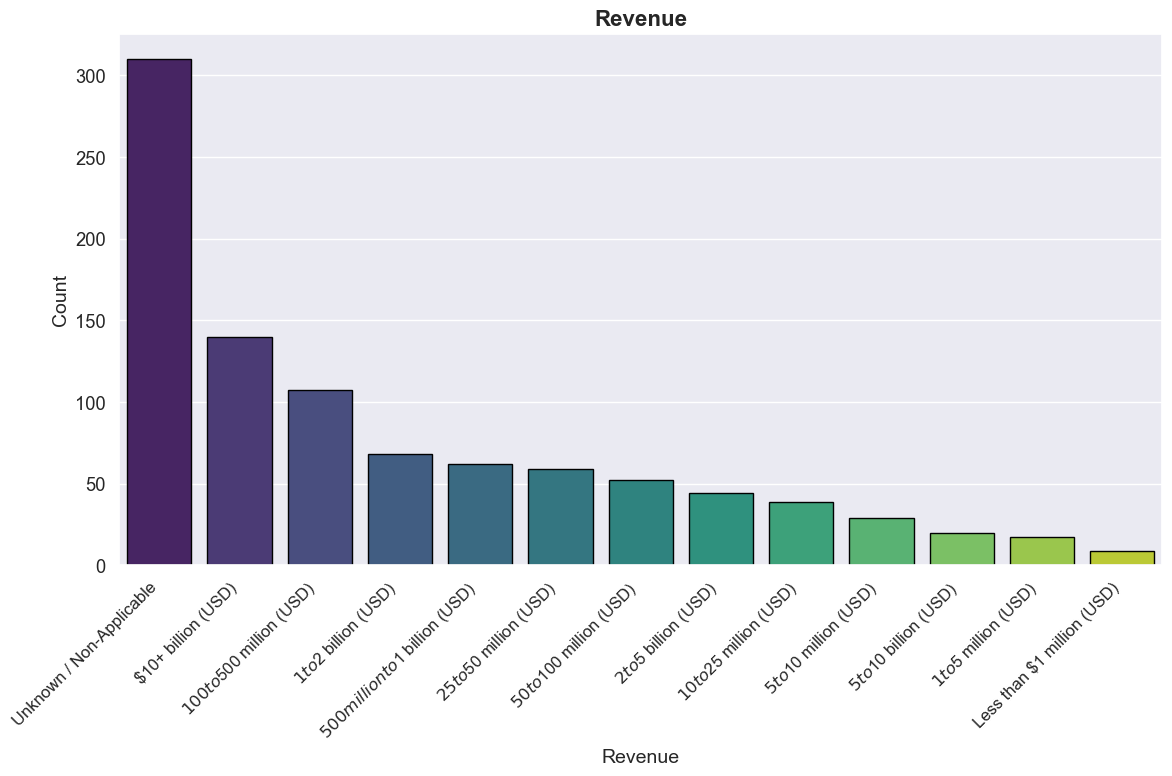

In [427]:
plt.figure(figsize=(12,8)) 

sns.countplot(
    x='Revenue',
    data=df,
    order=df['Revenue'].value_counts().index,
    palette='viridis',
    edgecolor='black'
)


plt.title('Revenue', fontsize=16, fontweight='bold')
plt.xlabel('Revenue', fontsize=14)
plt.ylabel('Count', fontsize=14)


plt.xticks(fontsize=12, rotation=45, ha='right')

plt.tight_layout()


plt.show()

**Analysing Competitors**

In [429]:
df['Competitors'].value_counts()[:15]

Competitors
-1                                                                                              634
Novartis, Baxter, Pfizer                                                                         14
Oak Ridge National Laboratory, National Renewable Energy Lab, Los Alamos National Laboratory     12
Travelers, Allstate, State Farm                                                                  10
Roche, GlaxoSmithKline, Novartis                                                                  9
Battelle, General Atomics, SAIC                                                                   8
Expedia Group, Orbitz Worldwide, Priceline.com                                                    7
Pitney Bowes                                                                                      6
FLURRY, Chartboost                                                                                6
Leidos, CACI International, Booz Allen Hamilton                                         

In [430]:
df['Competitors']=df['Competitors'].apply(lambda x: len(x.split(','))if x!='-1' else 0)

In [431]:
df['Competitors'].value_counts()[:5]

Competitors
0    634
3    253
2     50
1     18
4      1
Name: count, dtype: int64

C:\Users\dhanu\AppData\Local\Temp\ipykernel_10544\3579485492.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


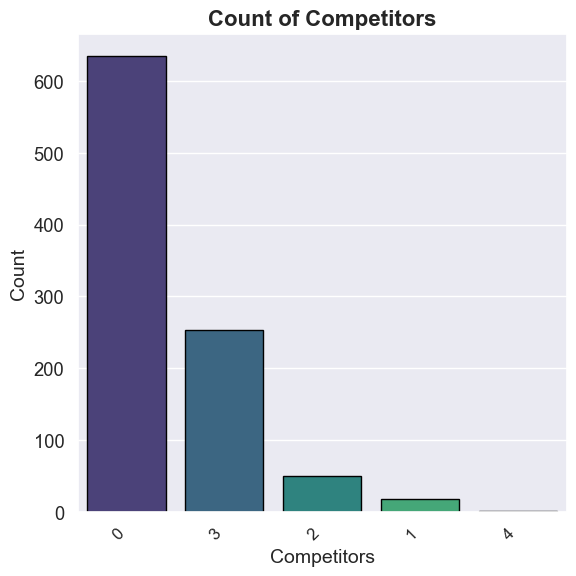

In [432]:
plt.figure(figsize=(6,6)) 

sns.countplot(
    x='Competitors',
    data=df,
    order=df['Competitors'].value_counts().index,
    palette='viridis',
    edgecolor='black'
)


plt.title('Count of Competitors', fontsize=16, fontweight='bold')
plt.xlabel('Competitors', fontsize=14)
plt.ylabel('Count', fontsize=14)


plt.xticks(fontsize=12, rotation=45, ha='right')

plt.tight_layout()


plt.show()

**Analysing Salary**

In [434]:
df['Salary Estimate'].head()

0     $53K-$91K (Glassdoor est.)
1    $63K-$112K (Glassdoor est.)
2     $80K-$90K (Glassdoor est.)
3     $56K-$97K (Glassdoor est.)
4    $86K-$143K (Glassdoor est.)
Name: Salary Estimate, dtype: object

In [435]:
df['Salary Estimate'].describe()

count     956
unique    417
top        -1
freq      214
Name: Salary Estimate, dtype: object

In [436]:
salary = df['Salary Estimate'].apply(lambda x: x.split("(")[0])
salary

0       $53K-$91K 
1      $63K-$112K 
2       $80K-$90K 
3       $56K-$97K 
4      $86K-$143K 
          ...     
951    $72K-$133K 
952     $56K-$91K 
953    $95K-$160K 
954             -1
955    $61K-$126K 
Name: Salary Estimate, Length: 956, dtype: object

In [437]:
salary.value_counts()[:10]

Salary Estimate
-1                  214
$86K-$143K            6
$54K-$115K            6
$49K-$113K            6
$21-$34 Per Hour      6
$81K-$167K            5
$76K-$142K            5
$74K-$124K            5
$107K-$173K           5
$18-$25 Per Hour      4
Name: count, dtype: int64

In [438]:
salary = salary.apply(lambda x:np.NaN if x=='-1' else x)
salary

0       $53K-$91K 
1      $63K-$112K 
2       $80K-$90K 
3       $56K-$97K 
4      $86K-$143K 
          ...     
951    $72K-$133K 
952     $56K-$91K 
953    $95K-$160K 
954            NaN
955    $61K-$126K 
Name: Salary Estimate, Length: 956, dtype: object

In [439]:
salary = salary.apply(lambda x: x if type(x) == type(3.5)  else x.replace('$','').replace('K',''))
salary

0       53-91 
1      63-112 
2       80-90 
3       56-97 
4      86-143 
        ...   
951    72-133 
952     56-91 
953    95-160 
954        NaN
955    61-126 
Name: Salary Estimate, Length: 956, dtype: object

In [440]:
print('Length of Salary:',len(salary.unique()))

Length of Salary: 417


In [441]:
#Removing string 'employee provided salary'

salary = salary.apply(lambda x: x if type(x)==type(3.5) else x.lower().replace('employer provided salary:',""))
salary

0       53-91 
1      63-112 
2       80-90 
3       56-97 
4      86-143 
        ...   
951    72-133 
952     56-91 
953    95-160 
954        NaN
955    61-126 
Name: Salary Estimate, Length: 956, dtype: object

In [442]:
# Converting per hour salaries to per year salaries(assuming 45 work hours per week and 52 working weeks)

def hourly_to_yearly(minlimit,maxlimit):
    x = minlimit.strip()
    y = maxlimit.strip()
    x= int(int(minlimit)*45*52/1000)
    y=int(int(maxlimit)*45*52/1000)
    return '{}-{}'.format(x,y)

salary = salary.apply(lambda x: x if type(x) == type(3.5) else (hourly_to_yearly(x.lower().replace("per hour","").split('-')[0],x.lower().replace("per hour","").split('-')[1]) if "per hour" in x.lower() else x))
salary

0       53-91 
1      63-112 
2       80-90 
3       56-97 
4      86-143 
        ...   
951    72-133 
952     56-91 
953    95-160 
954        NaN
955    61-126 
Name: Salary Estimate, Length: 956, dtype: object

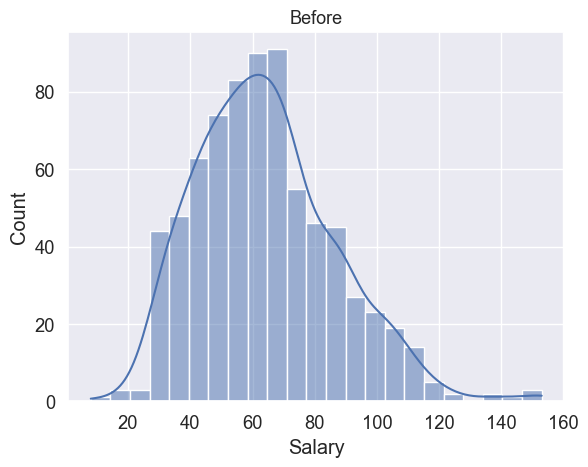

In [443]:
# Creating column for salary i.e. average of the range

df['Salary'] = salary.apply(lambda x: x if type(x)==type(3.5) else(int(x.split("-")[1].strip()))/2)

sns.histplot(df['Salary'],kde=True)
plt.title('Before', fontsize=13)
plt.show()

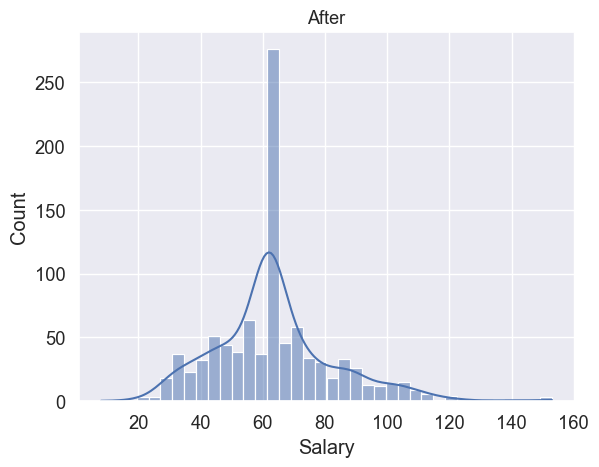

In [444]:
# as the graph follows Gaussian distribution but has a few outliers,so replace '-1' value by the median of the distribution

df['Salary'] = df['Salary'].fillna(df['Salary'].median())

sns.histplot(df['Salary'],kde=True)
plt.title('After', fontsize=13)
plt.show()

**Outlier Detection in Salaries**

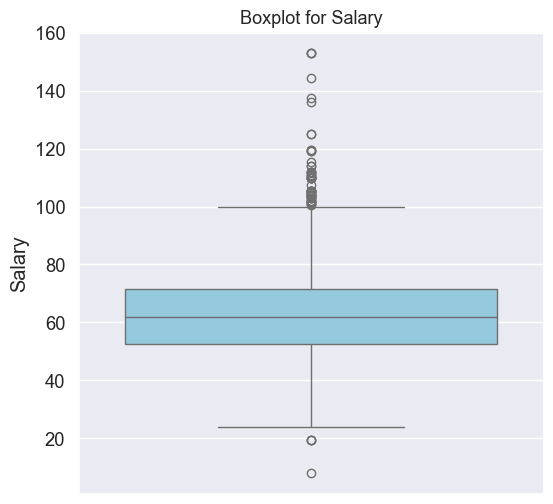

In [446]:
plt.figure(figsize=(6,6))
sns.boxplot(y='Salary',data = df, color = 'skyblue')
plt.title('Boxplot for Salary', fontsize=13)
plt.show()

# **Feature Engineering**

Creating new features from existing features

Trimming Columns

Handling ordinal and nominal categorical features

Feature Selection


 **Creating new features from existing features**

In [450]:
df.columns

Index(['Salary Estimate', 'Job Description', 'Rating', 'Company Name',
       'Location', 'Headquarters', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'Competitors', 'JobTitle',
       'JobSeniority', 'JobState', 'Salary'],
      dtype='object')

C:\Users\dhanu\AppData\Local\Temp\ipykernel_10544\1804818852.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


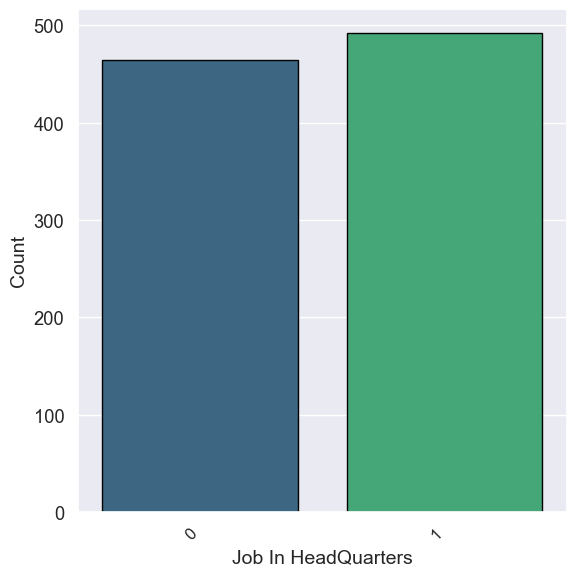

In [451]:
# Jobheadquarters

df['JobHeadQuarters']= df.apply(lambda x: 1 if x['Location'] == x['Headquarters'] else 0, axis=1)

plt.figure(figsize=(6,6)) 

sns.countplot(
    x='JobHeadQuarters',
    data=df,
    palette='viridis',
    edgecolor='black'
)

plt.xlabel('Job In HeadQuarters', fontsize=14)
plt.ylabel('Count', fontsize=14)


plt.xticks(fontsize=12, rotation=45, ha='right')

plt.tight_layout()


plt.show()

In [452]:
df.drop(columns=['Location'],axis=1,inplace=True)

**Python, Excel, SQL, Tableau Jobs( from Job Description)**

In [454]:
df['PythonJob']=df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
df['ExcelJob']=df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)
df['SqlJob'] = df['Job Description'].apply(lambda x: 1 if 'sql' in x.lower() else 0)
df['TableauJob'] = df['Job Description'].apply(lambda x: 1 if 'tableau' in x.lower() else 0)

C:\Users\dhanu\AppData\Local\Temp\ipykernel_10544\1947895633.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


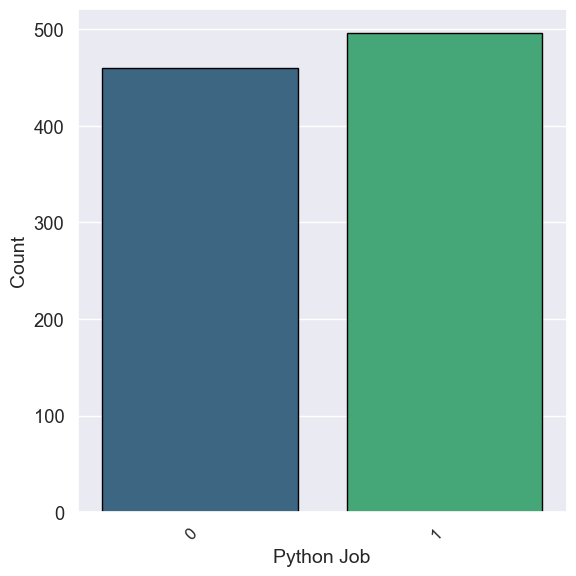

In [455]:
plt.figure(figsize=(6,6)) 

sns.countplot(
    x='PythonJob',
    data=df,
    palette='viridis',
    edgecolor='black'
)

plt.xlabel('Python Job', fontsize=14)
plt.ylabel('Count', fontsize=14)


plt.xticks(fontsize=12, rotation=45, ha='right')

plt.tight_layout()


plt.show()

C:\Users\dhanu\AppData\Local\Temp\ipykernel_10544\3225824325.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


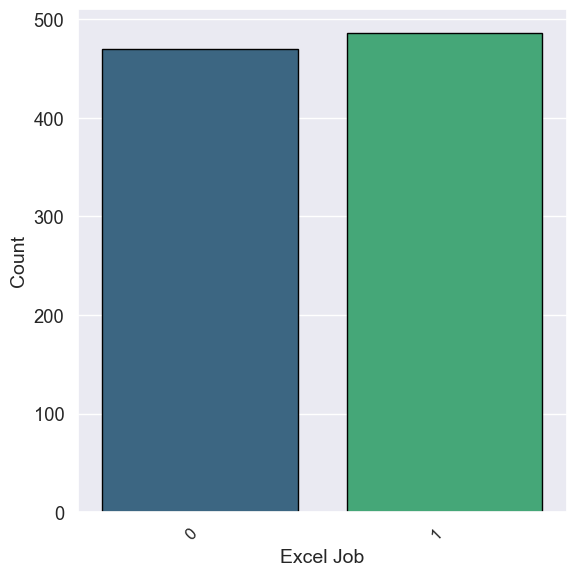

In [456]:
plt.figure(figsize=(6,6)) 

sns.countplot(
    x='ExcelJob',
    data=df,
    palette='viridis',
    edgecolor='black'
)

plt.xlabel('Excel Job', fontsize=14)
plt.ylabel('Count', fontsize=14)


plt.xticks(fontsize=12, rotation=45, ha='right')

plt.tight_layout()


plt.show()

C:\Users\dhanu\AppData\Local\Temp\ipykernel_10544\3857869466.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


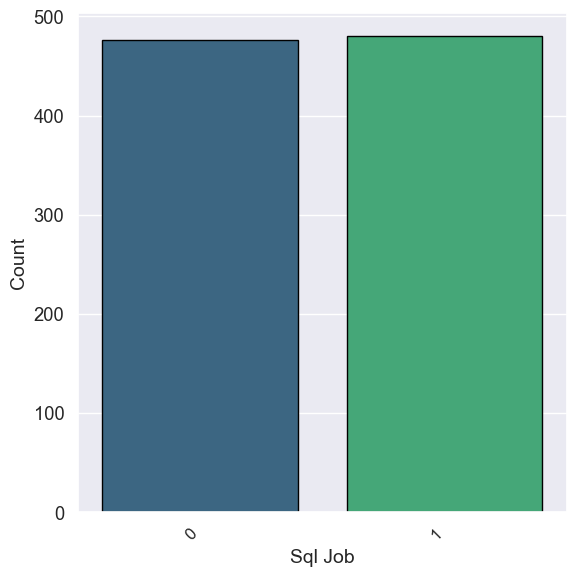

In [457]:
plt.figure(figsize=(6,6)) 

sns.countplot(
    x='SqlJob',
    data=df,
    palette='viridis',
    edgecolor='black'
)

plt.xlabel('Sql Job', fontsize=14)
plt.ylabel('Count', fontsize=14)


plt.xticks(fontsize=12, rotation=45, ha='right')

plt.tight_layout()


plt.show()

C:\Users\dhanu\AppData\Local\Temp\ipykernel_10544\1397577065.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


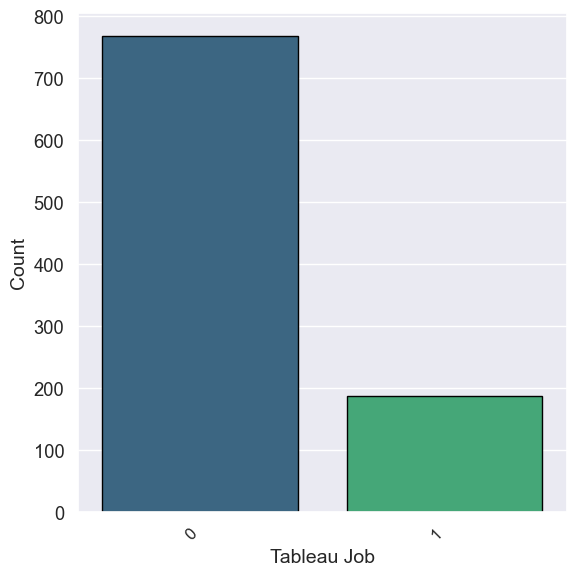

In [458]:
plt.figure(figsize=(6,6)) 

sns.countplot(
    x='TableauJob',
    data=df,
    palette='viridis',
    edgecolor='black'
)

plt.xlabel('Tableau Job', fontsize=14)
plt.ylabel('Count', fontsize=14)


plt.xticks(fontsize=12, rotation=45, ha='right')

plt.tight_layout()


plt.show()

In [459]:
df['Power BIJob'] = df['Job Description'].apply(lambda x: 1 if 'power bi' in x.lower() else 0)

C:\Users\dhanu\AppData\Local\Temp\ipykernel_10544\298289641.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


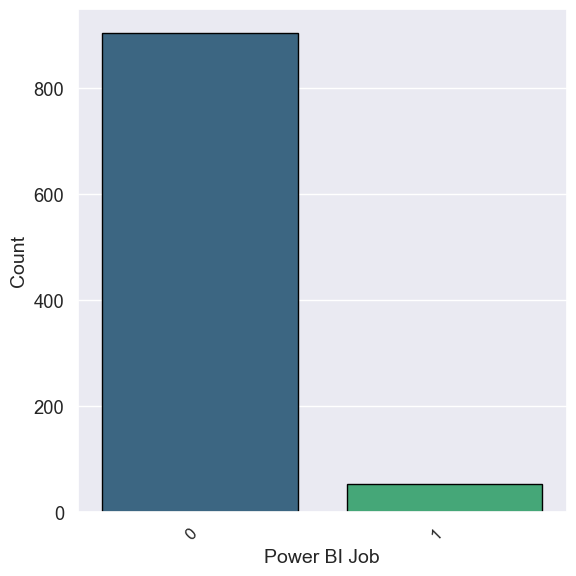

In [460]:
plt.figure(figsize=(6,6)) 

sns.countplot(
    x='Power BIJob',
    data=df,
    palette='viridis',
    edgecolor='black'
)

plt.xlabel('Power BI Job', fontsize=14)
plt.ylabel('Count', fontsize=14)


plt.xticks(fontsize=12, rotation=45, ha='right')

plt.tight_layout()


plt.show()

**Trimming Columns (for reducing dimensionality)**

In [462]:
# Taking top 10 States and replacing others by 'Others'

job_location_list = list(df['JobState'].value_counts()[:9].index)

def job_location_simplifier(title):
    if title not in job_location_list:
        return 'Others'
    else: 
        return title

df['JobState']=df['JobState'].apply(job_location_simplifier)

C:\Users\dhanu\AppData\Local\Temp\ipykernel_10544\1936061761.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


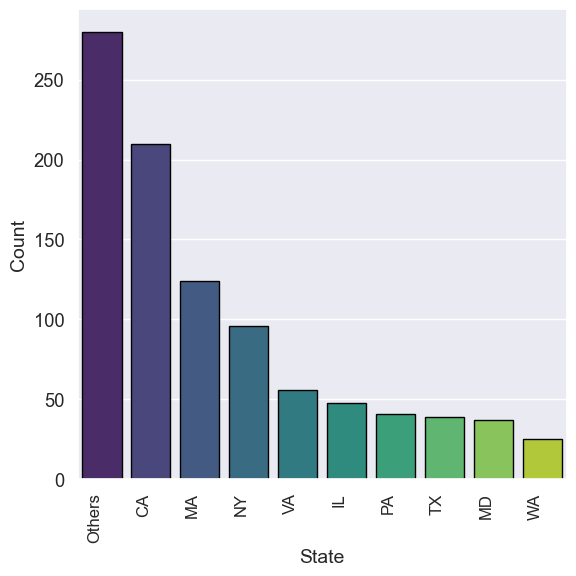

In [463]:
plt.figure(figsize=(6,6)) 

sns.countplot(
    x='JobState',
    data=df,
    palette='viridis',
    edgecolor='black',
    order = df['JobState'].value_counts().index
)

plt.xlabel('State', fontsize=14)
plt.ylabel('Count', fontsize=14)


plt.xticks(fontsize=12, rotation=90, ha='right')

plt.tight_layout()


plt.show()

In [464]:
#Top 10 Sectors
sector_list = list(df['Sector'].value_counts()[:10].index)

def sector_simplifier(title):
    if title not in sector_list:
        return 'Others'
    else:
        return title
df['Sector']= df['Sector'].apply(sector_simplifier)

C:\Users\dhanu\AppData\Local\Temp\ipykernel_10544\508095192.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


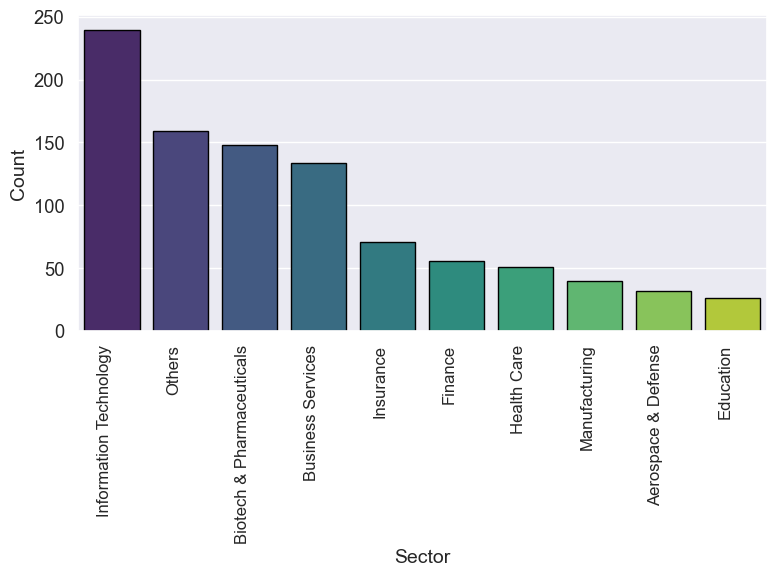

In [465]:
plt.figure(figsize=(8,6)) 

sns.countplot(
    x='Sector',
    data=df,
    palette='viridis',
    edgecolor='black',
    order = df['Sector'].value_counts().index
)

plt.xlabel('Sector', fontsize=14)
plt.ylabel('Count', fontsize=14)


plt.xticks(fontsize=12, rotation=90, ha='right')

plt.tight_layout()


plt.show()

In [466]:
df.columns

Index(['Salary Estimate', 'Job Description', 'Rating', 'Company Name',
       'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'Competitors', 'JobTitle', 'JobSeniority',
       'JobState', 'Salary', 'JobHeadQuarters', 'PythonJob', 'ExcelJob',
       'SqlJob', 'TableauJob', 'Power BIJob'],
      dtype='object')

In [467]:
 df.drop(columns=['Job Description','Salary Estimate','Company Name','Headquarters','Industry','JobState'],axis=1,inplace=True)

**Handling ordinal and nominal categorical features**

In [469]:

#Company size
size_map = {'Unknown': 0, '1 to 50 employees': 1, '51 to 200 employees': 2, '201 to 500 employees': 3,'501 to 1000 employees': 4, '1001 to 5000 employees': 5, '5001 to 10000 employees': 6, '10000+ employees': 7}
#Revenue column
revenue_map = {'Unknown / Non-Applicable':0,'Less than $ 1 million (USD)': 1, '$1 to $5 million (USD)': 2,'$5 to $10 million (USD)':3,'$10 to $25 million (USD)': 4, '$25 to $50 million (USD)': 5, '$50 to $100 million (USD)': 6, '$100 to $500 million (USD)': 7,'$500 million to $1 billion (USD)': 8, '$1 to $2 billion (USD)': 9, '$2 to $5 billion (USD)': 10, '$5 to $10 billion (USD)': 11,
'$10+ billion (USD)': 12}

#Mapping JobSeniority
job_seniority_map = {'other':0,'jr':1,'sr':2}

df['Size'] = df['Size'].map(size_map)
df['Revenue']=df['Revenue'].map(revenue_map)
df['JobSeniority'] = df['JobSeniority'].map(job_seniority_map)



In [470]:
df.head()

,Rating,Size,Founded,Type of ownership,Sector,Revenue,Competitors,JobTitle,JobSeniority,Salary,JobHeadQuarters,PythonJob,ExcelJob,SqlJob,TableauJob,Power BIJob
0,3.8,4,1973,Private,Aerospace & Defense,6.0,0,data scientist,0,45.5,0,1,1,0,1,1
1,3.4,7,1984,Other Organization,Health Care,10.0,0,data scientist,0,56.0,0,1,0,0,0,0
2,4.8,4,2010,Private,Business Services,7.0,0,data scientist,0,45.0,1,1,1,1,0,0
3,3.8,5,1965,Government,Others,8.0,3,data scientist,0,48.5,1,1,0,0,0,0
4,2.9,2,1998,Private,Business Services,0.0,3,data scientist,0,71.5,1,1,1,1,0,0


In [471]:
print('Shape before encoding Ownership:', df.shape)

df = pd.get_dummies(columns=['Type of ownership'],data=df,prefix='ownership')
print('Shape after encoding Ownership:', df.shape)

Shape before encoding Ownership: (956, 16)
Shape after encoding Ownership: (956, 26)


In [472]:
print('Shape before encoding Sector:', df.shape)

df = pd.get_dummies(columns=['Sector'],data=df,prefix='sector')
print('Shape after encoding Sector:', df.shape)

Shape before encoding Sector: (956, 26)
Shape after encoding Sector: (956, 35)


In [473]:
print('Shape before encoding JobTitle:', df.shape)

df = pd.get_dummies(columns=['JobTitle'],data=df,prefix='JobTitle')
print('Shape after encoding JobTitle:', df.shape)

Shape before encoding JobTitle: (956, 35)
Shape after encoding JobTitle: (956, 41)


In [474]:
df.columns

Index(['Rating', 'Size', 'Founded', 'Revenue', 'Competitors', 'JobSeniority',
       'Salary', 'JobHeadQuarters', 'PythonJob', 'ExcelJob', 'SqlJob',
       'TableauJob', 'Power BIJob', 'ownership_College / University',
       'ownership_Contract', 'ownership_Government', 'ownership_Hospital',
       'ownership_Nonprofit Organization', 'ownership_Other Organisation',
       'ownership_Other Organization', 'ownership_Private', 'ownership_Public',
       'ownership_School / School District',
       'ownership_Subsidiary or Business Segment',
       'sector_Aerospace & Defense', 'sector_Biotech & Pharmaceuticals',
       'sector_Business Services', 'sector_Education', 'sector_Finance',
       'sector_Health Care', 'sector_Information Technology',
       'sector_Insurance', 'sector_Manufacturing', 'sector_Others',
       'JobTitle_data analyst', 'JobTitle_data engineer',
       'JobTitle_data scientist', 'JobTitle_director', 'JobTitle_manager',
       'JobTitle_mle', 'JobTitle_other'],
    

In [475]:
df.drop(columns=['ownership_Other Organization','sector_Others', 'JobTitle_other'],axis=1 ,inplace=True)

In [476]:
df.shape

(956, 38)

In [477]:
df.isnull().sum()

Rating                                      0
Size                                        0
Founded                                     0
Revenue                                     9
Competitors                                 0
JobSeniority                                0
Salary                                      0
JobHeadQuarters                             0
PythonJob                                   0
ExcelJob                                    0
SqlJob                                      0
TableauJob                                  0
Power BIJob                                 0
ownership_College / University              0
ownership_Contract                          0
ownership_Government                        0
ownership_Hospital                          0
ownership_Nonprofit Organization            0
ownership_Other Organisation                0
ownership_Private                           0
ownership_Public                            0
ownership_School / School District

In [478]:
df.dropna(subset=['Revenue'],axis=0,inplace=True)

In [479]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [480]:
X = df.drop('Salary',axis=1)
y = df['Salary']

kbest = SelectKBest(score_func = mutual_info_regression, k ='all')
kbest.fit(X,y)

SelectKBest(k='all',
            score_func=<function mutual_info_regression at 0x0000015A38450D60>)

In [481]:
scores = kbest.scores_
features = X.columns
feature_scores = pd.DataFrame({'Feature': features, 'Score': scores})
print(feature_scores)


                                     Feature     Score
0                                     Rating  0.562092
1                                       Size  0.303330
2                                    Founded  0.512188
3                                    Revenue  0.346205
4                                Competitors  0.077241
5                               JobSeniority  0.127203
6                            JobHeadQuarters  0.085179
7                                  PythonJob  0.123810
8                                   ExcelJob  0.090187
9                                     SqlJob  0.060483
10                                TableauJob  0.056250
11                               Power BIJob  0.022492
12            ownership_College / University  0.014747
13                        ownership_Contract  0.002864
14                      ownership_Government  0.028784
15                        ownership_Hospital  0.065556
16          ownership_Nonprofit Organization  0.054087
17        

C:\Users\dhanu\AppData\Local\Temp\ipykernel_10544\2142244729.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=X.columns ,y=kbest.scores_,palette='viridis',edgecolor='black')


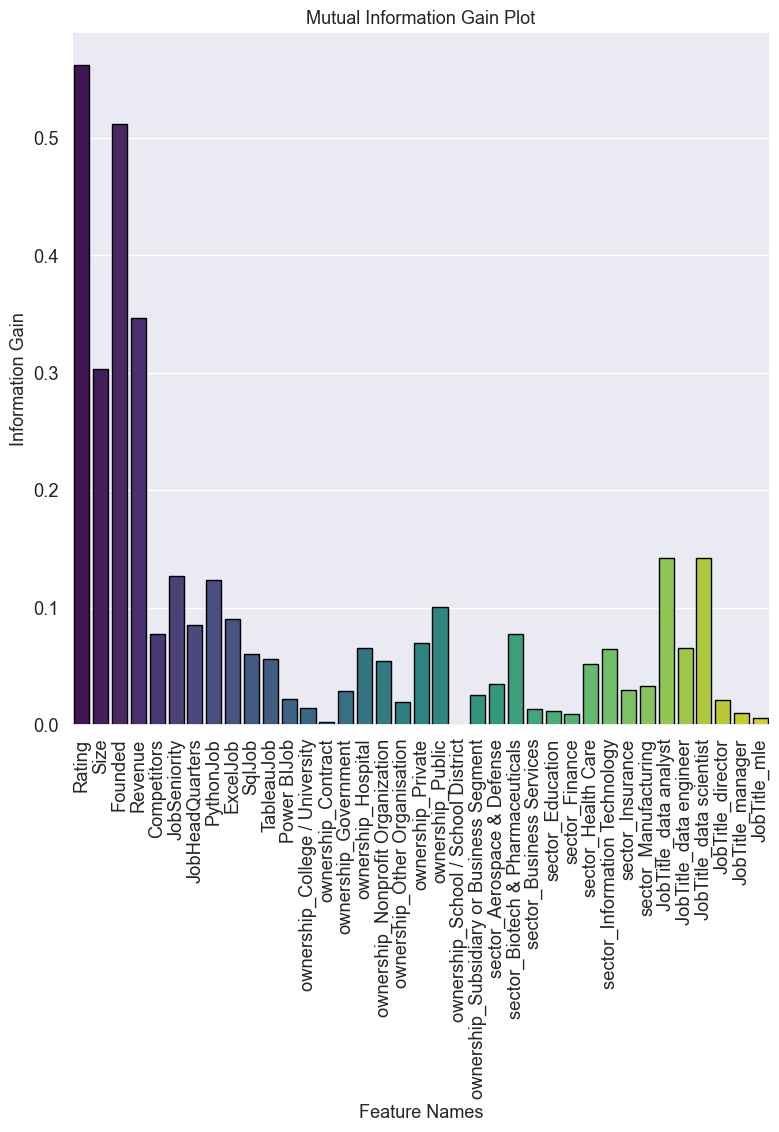

In [482]:
plt.figure(figsize=(9,9))
sns.barplot(x=X.columns ,y=kbest.scores_,palette='viridis',edgecolor='black')
plt.xticks(rotation=90)
plt.title('Mutual Information Gain Plot',fontsize=13)
plt.xlabel('Feature Names' ,fontsize=13)
plt.ylabel('Information Gain', fontsize=13)
plt.show()

## Feature Importance Based on Mutual Information Scores

### High Scores:
These features are more predictive and relevant for determining `Salary`. They should likely be included in our model:
- **Rating**: `0.533657`
- **Founded**: `0.517122`
- **Revenue**: `0.358916`

---

### Medium Scores:
These features have moderate importance but might still contribute meaningfully to the model:
- **Size**: `0.280639`
- **PythonJob**: `0.158796`
- **JobTitle_data scientist**: `0.143862`

---

### Low Scores:
These features contribute very little or nothing. You might consider excluding these in feature selection to simplify the model:
- **TableauJob**: `0.023039`
- **Power BIJob**: `0.001305`
- **ownership_School / School District**: `0.006616`

---

### Zero Scores:
These features have no predictive power for the target and can be dropped without any loss in accuracy:
- **ownership_Contract**: `0.000000`
- **ownership_Subsidiary or Business Segment**: `0.000000`
- **sector_Education**: `0.000000`


In [484]:
feature_importance = pd.DataFrame(kbest.scores_,columns=['Score'],index=X.columns)
top20_features = feature_importance.nlargest(n=20,columns=['Score'])
top20_features

,Score
Rating,0.562092
Founded,0.512188
Revenue,0.346205
Size,0.303330
JobTitle_data analyst,0.142637
JobTitle_data scientist,0.142038
JobSeniority,0.127203
PythonJob,0.123810
ownership_Public,0.100505
ExcelJob,0.090187


C:\Users\dhanu\AppData\Local\Temp\ipykernel_10544\1279602759.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top20_features.index, y=top20_features['Score'],palette='viridis',edgecolor='black')


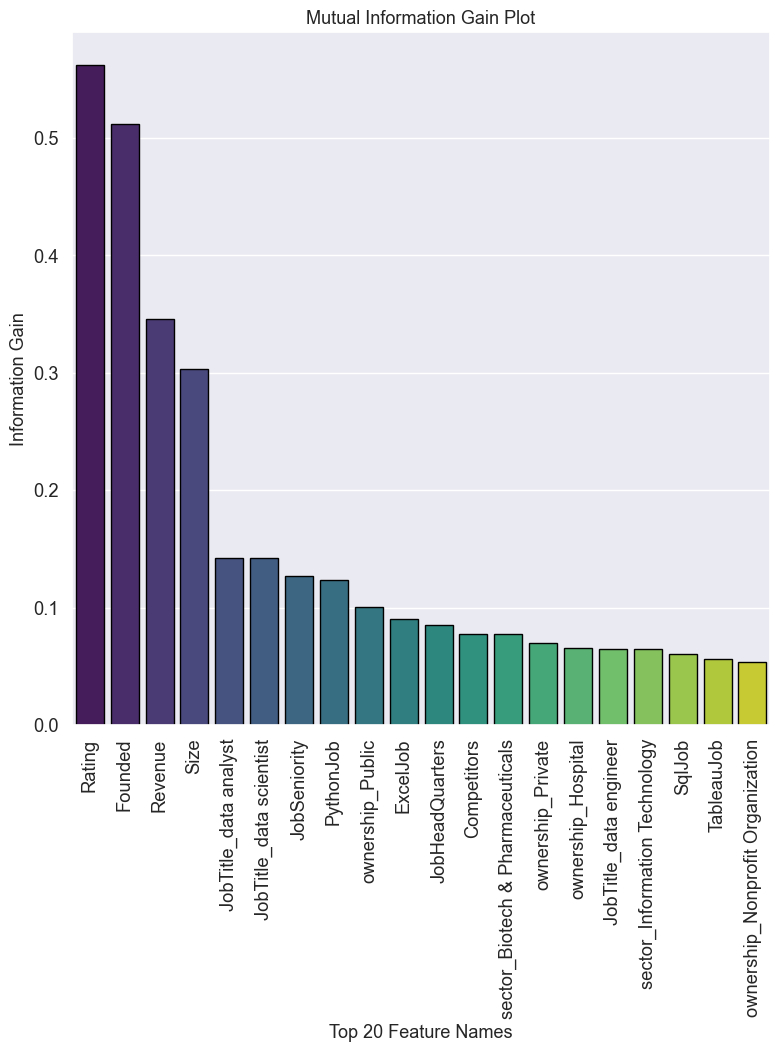

In [485]:
plt.figure(figsize=(9, 9))
sns.barplot(x=top20_features.index, y=top20_features['Score'],palette='viridis',edgecolor='black')
plt.xticks(rotation=90)
plt.title('Mutual Information Gain Plot', fontsize=13)
plt.xlabel('Top 20 Feature Names', fontsize=13)
plt.ylabel('Information Gain', fontsize=13)
plt.show()

**Correlation (between top 20 features)**

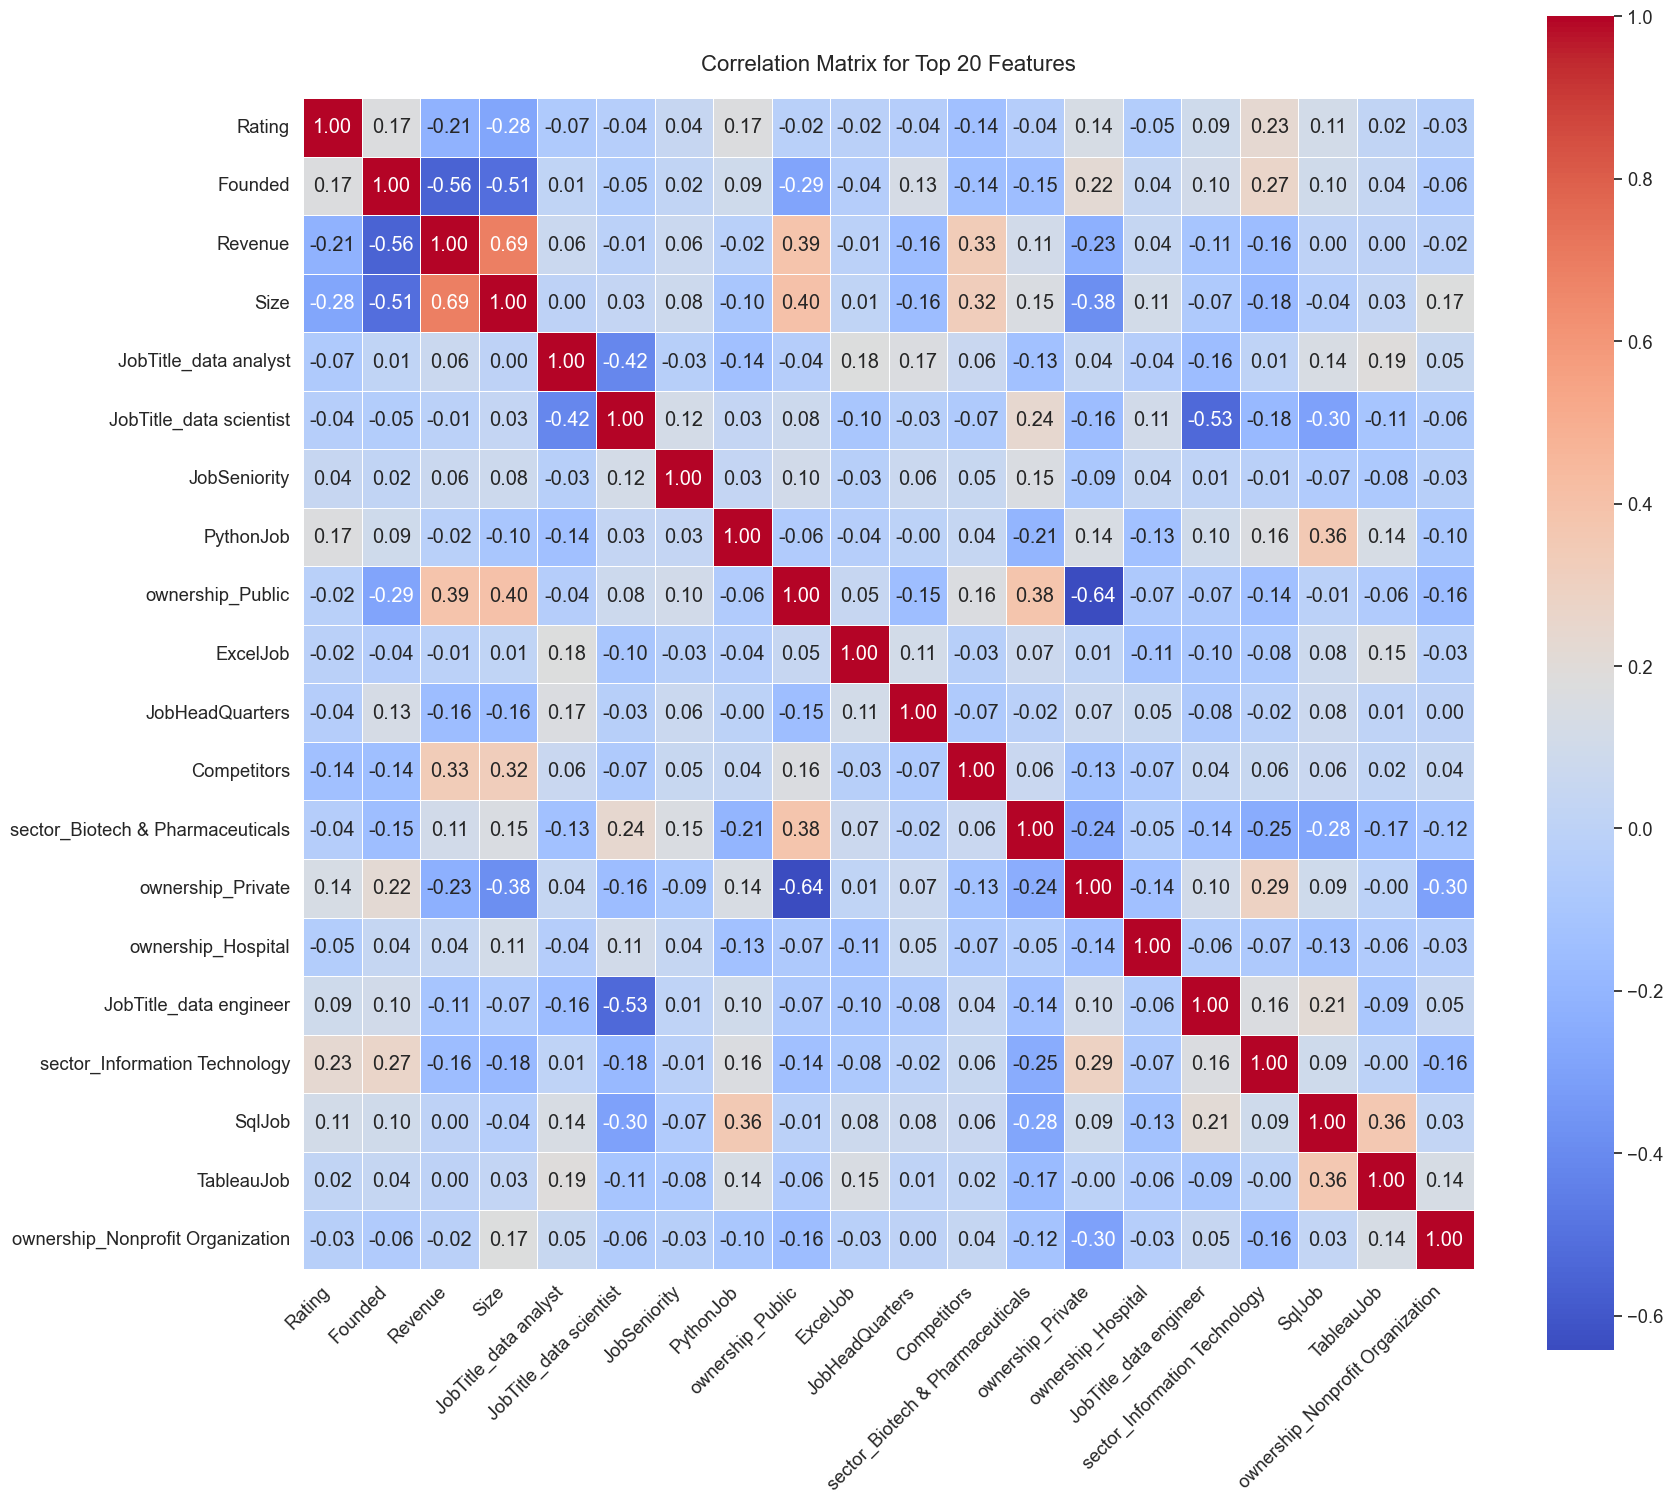

In [487]:

plt.figure(figsize=(18, 18))  
sns.set(font_scale=1.2)  
sns.heatmap(
    X[top20_features.index].corr(),  
    annot=True,                     
    fmt=".2f",                       
    cmap="coolwarm",                
    cbar_kws={"shrink": 0.8},        # Adjusting color bar size
    linewidths=0.5,                  
    square=True                      
)
plt.title('Correlation Matrix for Top 20 Features', fontsize=16, pad=20)  
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 
plt.show()


In [488]:
#Dropping highly correlated features
X = X[top20_features.index]
X.drop(columns=['ownership_Public', 'Size', 'Revenue',
                'JobTitle_data scientist'], axis=1, inplace=True)

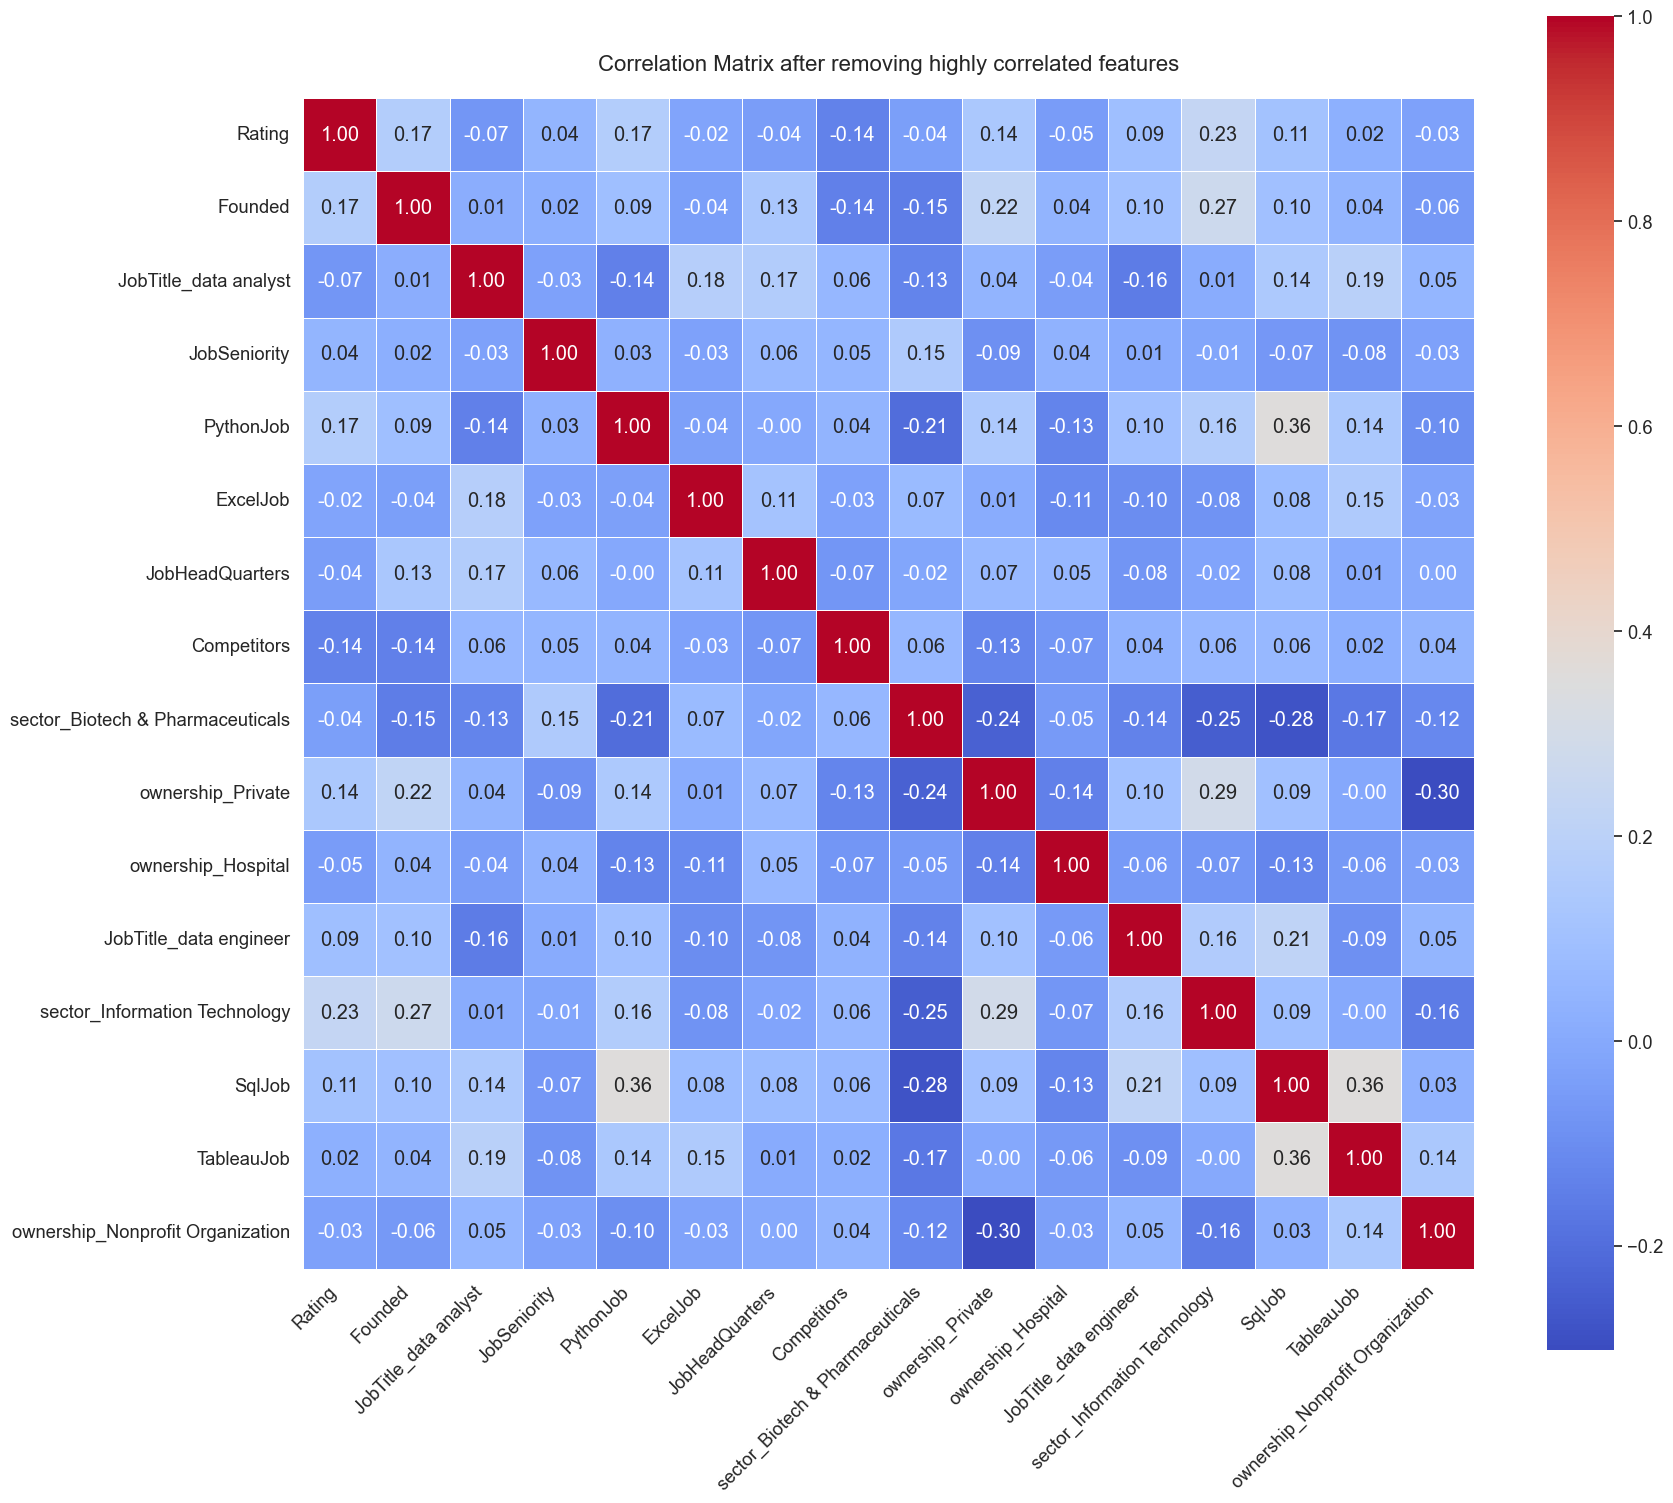

In [489]:

plt.figure(figsize=(18, 18))  
sns.set(font_scale=1.2)  
sns.heatmap(
    X.corr(),  
    annot=True,                     
    fmt=".2f",                       
    cmap="coolwarm",                
    cbar_kws={"shrink": 0.8},        # Adjusting color bar size
    linewidths=0.5,                  
    square=True                      
)
plt.title('Correlation Matrix after removing highly correlated features', fontsize=16, pad=20)  
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 
plt.show()


In [490]:
X.head()

,Rating,Founded,JobTitle_data analyst,JobSeniority,PythonJob,ExcelJob,JobHeadQuarters,Competitors,sector_Biotech & Pharmaceuticals,ownership_Private,ownership_Hospital,JobTitle_data engineer,sector_Information Technology,SqlJob,TableauJob,ownership_Nonprofit Organization
0,3.8,1973,False,0,1,1,0,0,False,True,False,False,False,0,1,False
1,3.4,1984,False,0,1,0,0,0,False,False,False,False,False,0,0,False
2,4.8,2010,False,0,1,1,1,0,False,True,False,False,False,1,0,False
3,3.8,1965,False,0,1,0,1,3,False,False,False,False,False,0,0,False
4,2.9,1998,False,0,1,1,1,3,False,True,False,False,False,1,0,False


In [491]:
X_prev = X.copy()

In [492]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

X['Rating'] = scaler.fit_transform(X[['Rating']])
X['Founded']=scaler.fit_transform(X[['Founded']])

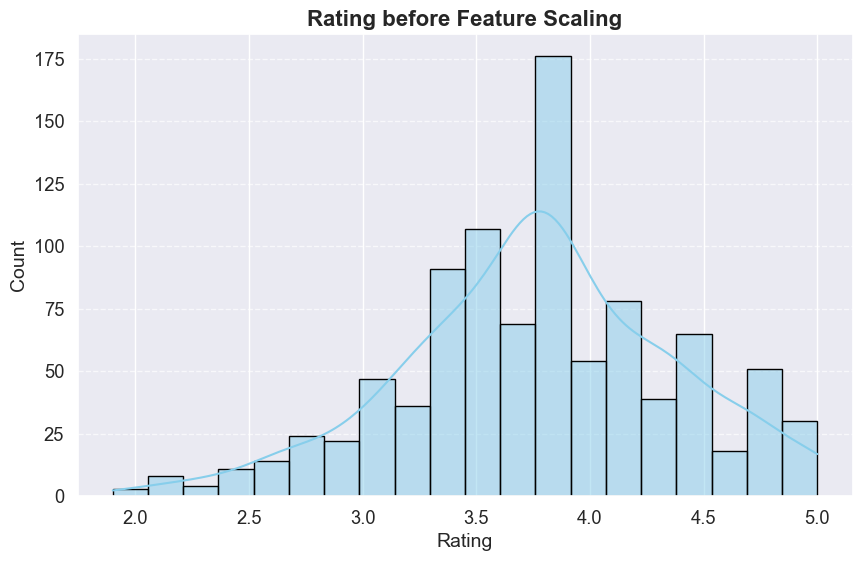

In [493]:
plt.figure(figsize=(10, 6))  
sns.histplot(
    X_prev['Rating'],
    kde=True,
    bins=20,  
    color='skyblue', 
    edgecolor='black' 
)


plt.title('Rating before Feature Scaling', fontsize=16, fontweight='bold')
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)


plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

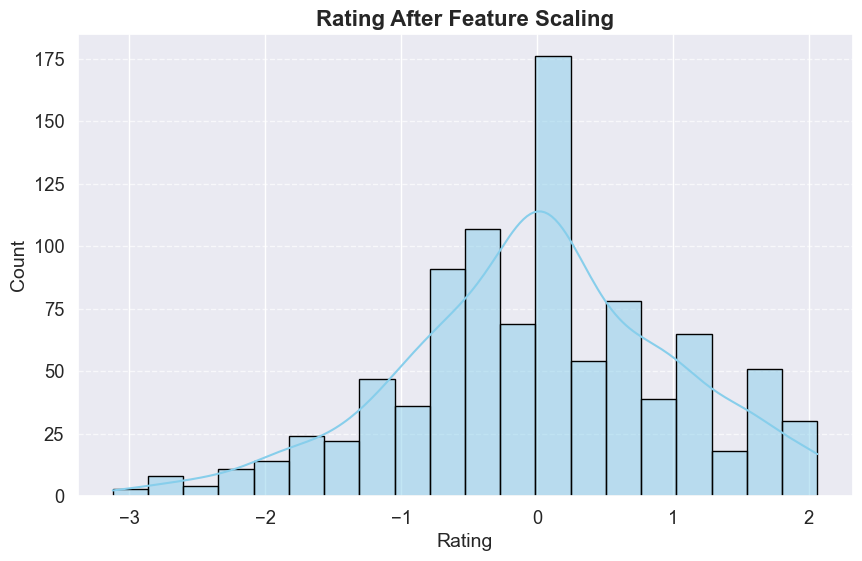

In [494]:
plt.figure(figsize=(10, 6))  
sns.histplot(
    X['Rating'],
    kde=True,
    bins=20,  
    color='skyblue', 
    edgecolor='black' 
)


plt.title('Rating After Feature Scaling', fontsize=16, fontweight='bold')
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)


plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# **Model Building**

In [496]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

**Linear Regression**

In [498]:
lr = LinearRegression()

cv_lr = cross_val_score(lr,X,y,cv=10,scoring = 'neg_root_mean_squared_error')

print(f'NRMSE: {cv_lr.mean():.3f}')
print(f'Standard Deviation: {cv_lr.std():.3f}')

NRMSE: -16.318
Standard Deviation: 1.465


**NRMSE**: The average error in model's predictions is about 16.3 units (on the scale of your target variable).

**Standard Deviation**: A deviation of 1.465 shows reasonable consistency across the cross-validation folds.

**Ridge Regression**

In [501]:
from sklearn.linear_model import Ridge 
rg = Ridge()

cv_rg = cross_val_score(rg,X,y,cv=10,scoring='neg_root_mean_squared_error')
print(f'NRMSE: {cv_rg.mean():.3f}')
print(f'Standard Deviation: {cv_rg.std():.3f}')

NRMSE: -16.317
Standard Deviation: 1.461


**Lasso Regression**

In [503]:
from sklearn.linear_model import Lasso
ls = Lasso()

cv_ls = cross_val_score(ls,X,y,cv=10,scoring='neg_root_mean_squared_error')
print(f'NMRSE: {cv_ls.mean():.3f}')
print(f'Standard Deviation: {cv_ls.std():.3f}')

NMRSE: -17.297
Standard Deviation: 1.158


**Random-Forest Regressor**

In [505]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

cv_rfr = cross_val_score(rfr,X,y,cv=10,scoring ='neg_root_mean_squared_error')
print(f'NRMSE: {cv_rfr.mean():.3f}')
print(f'Standard Deviation: {cv_rfr.std():.3f}')

NRMSE: -10.779
Standard Deviation: 3.185


**Gradient Boosting Regressor**

In [507]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

cv_gbr = cross_val_score(gbr,X,y,cv=10,scoring='neg_root_mean_squared_error')
print(f'NRMSE: {cv_gbr.mean():.3f}')
print(f'Standard Deviation: {cv_gbr.std():.3f}')

NRMSE: -14.593
Standard Deviation: 1.678


In [508]:
models = pd.DataFrame({'Regression Model':['Linear-Regression','Ridge-Regression','Lasso-Regression','Random-Forest','Gradient-Boosting'],
                       'NRMSE': [
                           round(cv_lr.mean(),3),
                           round(cv_rg.mean(),3),
                           round(cv_ls.mean(),3),
                           round(cv_rfr.mean(),3),
                           round(cv_gbr.mean(),3)]
                      })

models.sort_values(by='NRMSE',ascending=False)

,Regression Model,NRMSE
3,Random-Forest,-10.779
4,Gradient-Boosting,-14.593
1,Ridge-Regression,-16.317
0,Linear-Regression,-16.318
2,Lasso-Regression,-17.297


# Regression Models Comparison

The table shows the **Negative Root Mean Squared Error (NRMSE)** for different regression models. Here's a detailed interpretation of the results:

### Regression Models:
- **Random Forest**  
- **Gradient Boosting**  
- **Ridge Regression**  
- **Linear Regression**  
- **Lasso Regression**  

### NRMSE Values:
The **Negative Root Mean Squared Error (NRMSE)** represents the average prediction error for each model across the cross-validation folds. The values are negative because scikit-learn uses scores that are maximized, and RMSE is a loss metric (lower is better). The absolute value of NRMSE gives an indication of how well the model is predicting the target variable.

#### Models and Their NRMSE:

1. **Random Forest**: \( -10.779 \)
   - **Interpretation**: Random Forest has the **lowest NRMSE** among all models, meaning it has the **smallest average prediction error**. It is the **best-performing model** in this case.
   - **Why it works**: Random Forest, being an ensemble of decision trees, is able to capture complex, nonlinear relationships between features and the target variable effectively.

2. **Gradient Boosting**: \( -14.593 \)
   - **Interpretation**: Gradient Boosting has a **higher NRMSE** than Random Forest, indicating that it has a slightly larger average error. Still, it performs well with an average error of \( 14.593 \).
   - **Why it works**: Gradient Boosting builds trees sequentially to correct the errors of previous trees. It is a powerful model, especially for complex datasets, but can be more prone to overfitting if hyperparameters are not tuned properly.

3. **Ridge Regression**: \( -16.317 \)
   - **Interpretation**: Ridge Regression has a **larger NRMSE** than Random Forest and Gradient Boosting. This suggests that it doesn’t perform as well in terms of prediction accuracy.
   - **Why it works**: Ridge Regression applies L2 regularization to a linear regression model, which helps prevent overfitting. However, it assumes a linear relationship between features and the target, which might not capture complex patterns as effectively as ensemble methods.

4. **Linear Regression**: \( -16.318 \)
   - **Interpretation**: Linear Regression performs almost identically to Ridge Regression, with an NRMSE value of \( -16.318 \).
   - **Why it works**: Like Ridge, Linear Regression assumes a linear relationship between the features and target variable. Since the dataset may have nonlinear relationships, Linear Regression does not perform as well as the ensemble models.

5. **Lasso Regression**: \( -17.297 \)
   - **Interpretation**: Lasso Regression has the **highest NRMSE**, indicating it has the **largest prediction error**. This suggests it is the **least effective model** in this comparison.
   - **Why it works**: Lasso applies L1 regularization, which can shrink some coefficients to zero, leading to feature selection. However, in cases where many features are important, this can result in underfitting and a higher NRMSE.

---

### **Interpretation Summary:**

- **Best Performing Models**:  
   - **Random Forest** provides the best performance, with the lowest NRMSE, followed by **Gradient Boosting**. Both models are ensemble methods, which handle complex, nonlinear relationships well.
   
- **Linear Models**:  
   - **Ridge** and **Linear Regression** have similar performance, with slightly higher NRMSE values. These models assume linear relationships and may struggle with capturing more complex patterns, which leads to poorer performance compared to ensemble models.
   
- **Lasso Regression**:  
   - **Lasso** has the highest NRMSE, likely due to its aggressive feature selection, which can discard useful features, leading to underfitting, especially when the true relationships are complex.


